In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import gc
from pathlib import Path
plt.style.use('ggplot')
import os
from PIL import Image
from ast import literal_eval


In [3]:
gc.collect()
df = pd.read_excel('data_All_Hotels_France.xlsx')
df.head()

,Unnamed: 0,Link,name,address,number,hotel_experience,Price,review,rating,amenities,rank,Description,Grade_walkers,N_nearRestaurants,N_nearAttractions,Note_Location,Note_Cleanliness,Note_Service,Note_Value,Src_image
0,0,https://www.tripadvisor.com/Hotel_Review-g2073...,Hotel Saint Guirec et de la Plage,"162 rue de Saint Guirec, 22700, Perros-Guirec ...",None,Excellent,€75,619 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#4 of 24 hotels in Perros-Guirec,See why so many travelers make Hotel Saint Gui...,75 out of 100,15,12,4.9,4.4,4.3,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...
1,1,https://www.tripadvisor.com/Hotel_Review-g1870...,Le Boutique Hotel & Spa,"3 Rue Lafaurie de Monbadon, 33000, Bordeaux Fr...",0519100370,Excellent,NaN,"1,291 reviews",4.5,"['Paid public parking nearby', 'Free High Spee...",#9 of 194 hotels in Bordeaux,Le Boutique Hotel Bordeaux is situated in a ma...,100 out of 100,256,86,4.8,4.7,4.7,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...
2,2,https://www.tripadvisor.com/Hotel_Review-g9683...,Jiva Hill Resort,"Route d'Haree, 01170 Crozet France",0481922758,Excellent,€235,606 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#1 of 2 hotels in Crozet,Nous avons en effet mis en œuvre et formé nos ...,None,None,None,4.5,4.8,4.5,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...
3,3,https://www.tripadvisor.com/Hotel_Review-g2192...,Chateau Les Oliviers De Salettes,"1205 route du Chateau, 26450 Charols France",None,Excellent,€130,751 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",None,After three years of renovations and meticulou...,None,None,None,4.7,4.6,4.4,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...
4,4,https://www.tripadvisor.com/Hotel_Review-g1182...,Best Western Hotel Nuit de Retz,"Rue du Grand Pre Zone de Loisirs, 44710 Port-S...",None,Excellent,€90,271 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#1 of 3 B&Bs / Inns in Port-Saint-Pere,Everyone needs a place to lay their weary head...,None,None,None,4.2,4.8,4.7,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...


In [117]:
df = df.rename(columns={"Unnamed: 0": "Id"})

In [118]:
df.drop_duplicates()

,Id,Link,name,address,number,hotel_experience,Price,review,rating,amenities,rank,Description,Grade_walkers,N_nearRestaurants,N_nearAttractions,Note_Location,Note_Cleanliness,Note_Service,Note_Value,Src_image
0,0,https://www.tripadvisor.com/Hotel_Review-g2073...,Hotel Saint Guirec et de la Plage,"162 rue de Saint Guirec, 22700, Perros-Guirec ...",None,Excellent,€75,619 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#4 of 24 hotels in Perros-Guirec,See why so many travelers make Hotel Saint Gui...,75 out of 100,15,12,4.9,4.4,4.3,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...
1,1,https://www.tripadvisor.com/Hotel_Review-g1870...,Le Boutique Hotel & Spa,"3 Rue Lafaurie de Monbadon, 33000, Bordeaux Fr...",0519100370,Excellent,NaN,"1,291 reviews",4.5,"['Paid public parking nearby', 'Free High Spee...",#9 of 194 hotels in Bordeaux,Le Boutique Hotel Bordeaux is situated in a ma...,100 out of 100,256,86,4.8,4.7,4.7,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...
2,2,https://www.tripadvisor.com/Hotel_Review-g9683...,Jiva Hill Resort,"Route d'Haree, 01170 Crozet France",0481922758,Excellent,€235,606 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#1 of 2 hotels in Crozet,Nous avons en effet mis en œuvre et formé nos ...,None,None,None,4.5,4.8,4.5,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...
3,3,https://www.tripadvisor.com/Hotel_Review-g2192...,Chateau Les Oliviers De Salettes,"1205 route du Chateau, 26450 Charols France",None,Excellent,€130,751 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",None,After three years of renovations and meticulou...,None,None,None,4.7,4.6,4.4,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...
4,4,https://www.tripadvisor.com/Hotel_Review-g1182...,Best Western Hotel Nuit de Retz,"Rue du Grand Pre Zone de Loisirs, 44710 Port-S...",None,Excellent,€90,271 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#1 of 3 B&Bs / Inns in Port-Saint-Pere,Everyone needs a place to lay their weary head...,None,None,None,4.2,4.8,4.7,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,495,https://www.tripadvisor.com/Hotel_Review-g1871...,Hotel Les Mouettes,"9 cours Lucien Bonaparte, 20000 Ajaccio, Commu...",0495504040,Excellent,€140,820 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#5 of 32 hotels in Ajaccio,Nous suivons de très près l’évolution de l’épi...,56 out of 100,27,11,4.6,4.8,4.6,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...
2900,496,https://www.tripadvisor.com/Hotel_Review-g1872...,Les Messugues,"Allee des Lavandes Impasse des Messugues, 0657...",None,Excellent,€100,223 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#5 of 12 hotels in St-Paul-de-Vence,The hotel's splendid heated swimming pool and ...,70 out of 100,36,17,4.5,4.7,4.6,4.4,https://dynamic-media-cdn.tripadvisor.com/medi...
2901,497,https://www.tripadvisor.com/Hotel_Review-g5828...,Chateauzen,"303 Route Du Cros Madiere, 30120 Rogues France",0467718538,Excellent,NaN,177 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#1 of 3 Specialty lodging in Rogues,"In nature, away from the stress, noise and pol...",None,None,None,4.8,4.5,4.6,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...
2902,498,https://www.tripadvisor.com/Hotel_Review-g1872...,Hotel de Paris Saint-Tropez,"1 Traverse de la Gendarmerie, 83990, Saint-Tro...",None,Excellent,€391,736 reviews,4.5,"['Electric vehicle charging station', 'Free Hi...",#9 of 47 hotels in Saint-Tropez,L'Hôtel de Paris Saint-Tropez s'est adjoint l'...,100 out of 100,111,20,4.9,4.8,4.6,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...


we have 2904 French hotels registred in tripAdvisor

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 2904 non-null   int64  
 1   Link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             2904 non-null   object 
 5   hotel_experience   2904 non-null   object 
 6   Price              1219 non-null   object 
 7   review             2904 non-null   object 
 8   rating             2904 non-null   object 
 9   amenities          2904 non-null   object 
 10  rank               2904 non-null   object 
 11  Description        2902 non-null   object 
 12  Grade_walkers      2904 non-null   object 
 13  N_nearRestaurants  2904 non-null   object 
 14  N_nearAttractions  2904 non-null   object 
 15  Note_Location      2901 non-null   float64
 16  Note_Cleanliness   2900 

In [120]:
df.isnull().sum()

Id                      0
Link                    0
name                    0
address                 0
number                  0
hotel_experience        0
Price                1685
review                  0
rating                  0
amenities               0
rank                    0
Description             2
Grade_walkers           0
N_nearRestaurants       0
N_nearAttractions       0
Note_Location           3
Note_Cleanliness        4
Note_Service            4
Note_Value              6
Src_image               0
dtype: int64

In [121]:
df1 = df.copy()
df1.replace('None',np.nan, inplace=True)
df1['review'] = df1[~df1.review.isnull()].review.apply(lambda x:x.split(' ')[0].strip().replace(',', '')).astype(int)
df1['rating'] = df1.rating.astype(float)
df1[~df1.Grade_walkers.isnull()].Grade_walkers.apply(lambda x: x.strip().split(' ')[0])
df1.N_nearRestaurants = df1.N_nearRestaurants.astype(float)
df1.N_nearAttractions = df1.N_nearAttractions.astype(float)

In [147]:
df1['amenities'] = df1.amenities.str.replace('[',"")
df1['amenities'] = df1.amenities.str.replace(']',"")
df3 = df1.amenities.str.get_dummies(',')
df4 = df1[['rating']].join(df3)

C:\Users\abdou\AppData\Local\Temp\ipykernel_21628\2829986705.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['amenities'] = df1.amenities.str.replace('[',"")
C:\Users\abdou\AppData\Local\Temp\ipykernel_21628\2829986705.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['amenities'] = df1.amenities.str.replace(']',"")


,rating,"""Children's playground""","""Children's television networks""","""Kids' meals""","""Kids' outdoor play equipment""",'24-hour check-in','24-hour front desk','24-hour security','ATM on site','Additional bathroom',...,'Paid public parking on-site','Paid wifi','Parking garage','Parking','Pets Allowed ( Dog / Pet Friendly )','Pool','Secured parking','Street parking','Valet parking','Wifi'
0,2.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1,2,1,1,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.5,1,1,4,3,3,7,2,1,1,...,0,0,0,2,0,0,0,0,0,0
3,4.0,16,24,27,50,32,67,18,5,2,...,2,1,1,5,0,0,0,0,2,2
4,4.5,116,180,258,196,324,528,248,8,18,...,12,0,3,67,0,1,0,7,40,2
5,5.0,57,87,100,93,85,133,74,0,20,...,2,0,0,15,1,1,2,5,11,0


In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 2904 non-null   int64  
 1   Link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             523 non-null    object 
 5   hotel_experience   2903 non-null   object 
 6   Price              1219 non-null   object 
 7   review             2903 non-null   float64
 8   rating             2903 non-null   float64
 9   amenities          2904 non-null   object 
 10  rank               2526 non-null   object 
 11  Description        2880 non-null   object 
 12  Grade_walkers      1499 non-null   object 
 13  N_nearRestaurants  1499 non-null   float64
 14  N_nearAttractions  1499 non-null   float64
 15  Note_Location      2901 non-null   float64
 16  Note_Cleanliness   2900 

In [125]:
def get_nb_of_amenities(listing):
    listing_amenities_list = listing.replace('"','').replace('[','').replace(']','').split(',')
    return len(listing_amenities_list)

df1['nb_of_amenities'] = df1['amenities'].apply(get_nb_of_amenities)

<AxesSubplot:xlabel='nb_of_amenities', ylabel='name'>

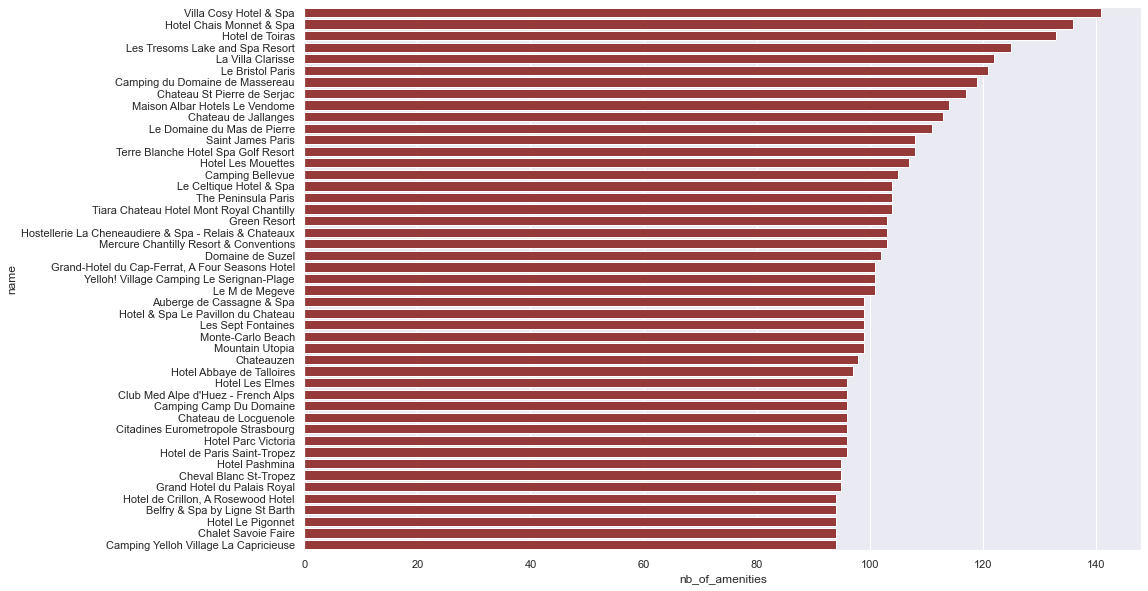

In [137]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data=df1.sort_values(by = 'nb_of_amenities', ascending=False).head(50), x="nb_of_amenities", y="name", color = 'brown')

<AxesSubplot:xlabel='rating', ylabel='nb_of_amenities'>

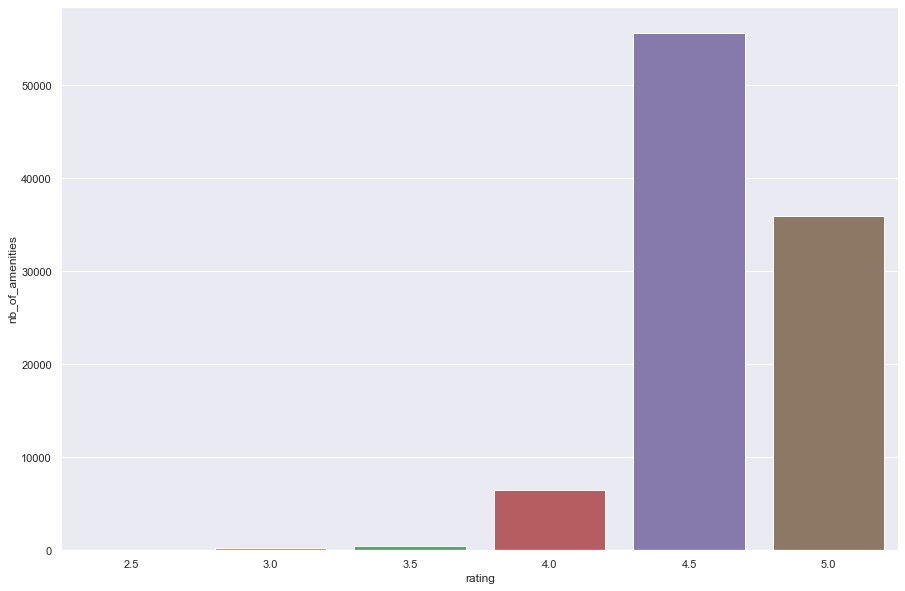

In [144]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data=df1.groupby('rating')['nb_of_amenities'].sum().reset_index(), x="rating", y="nb_of_amenities")

<AxesSubplot:xlabel='rating', ylabel='nb_of_amenities'>

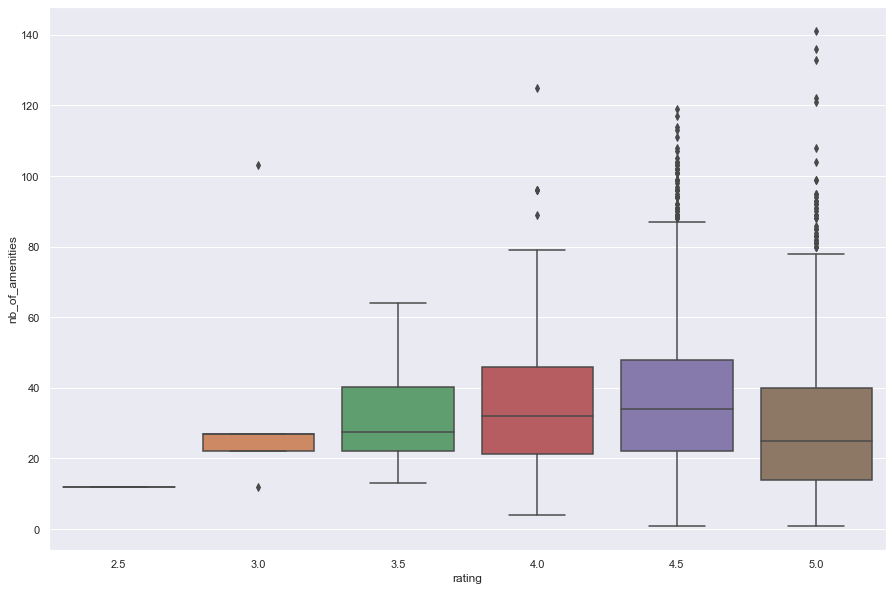

In [319]:
sns.boxplot(data=df1, x="rating", y="nb_of_amenities")

<AxesSubplot:xlabel='rating', ylabel='review'>

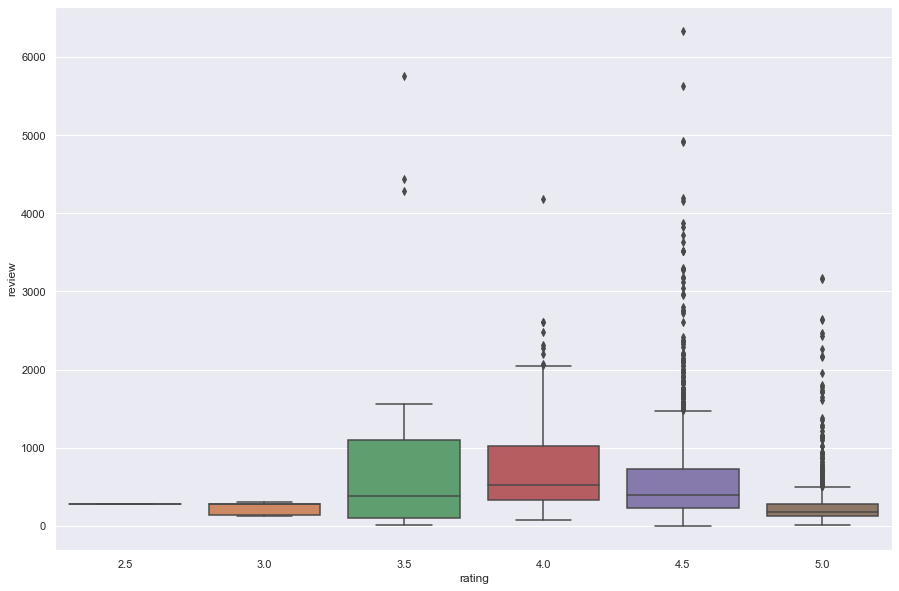

In [322]:
sns.boxplot(data=df1, x="rating", y="review")

<AxesSubplot:xlabel='rating', ylabel='count'>

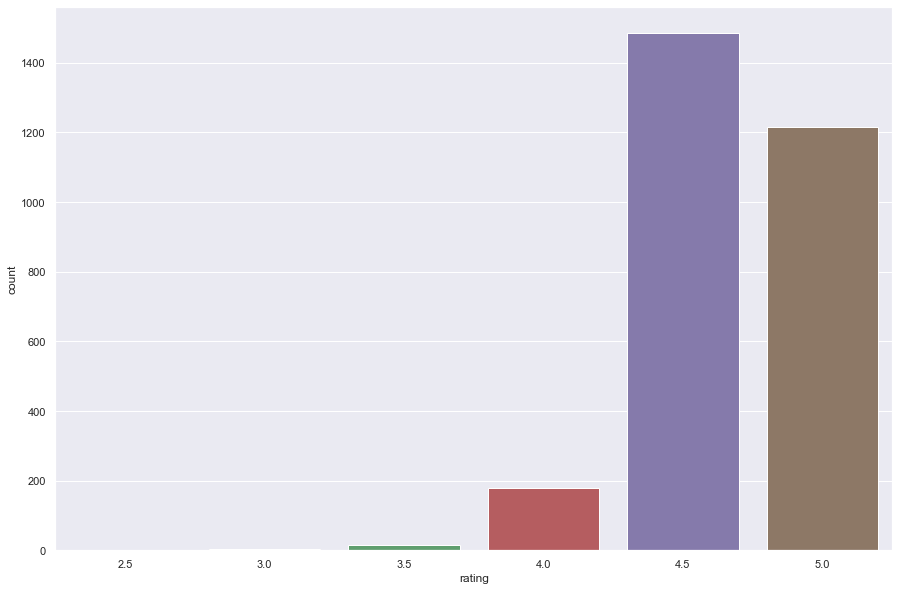

In [321]:
sns.countplot(data=df1,x='rating')


In [128]:
df1.rating.value_counts(normalize=True)

4.5    0.512229
5.0    0.418533
4.0    0.061316
3.5    0.005512
3.0    0.001722
2.5    0.000689
Name: rating, dtype: float64

<AxesSubplot:xlabel='hotel_experience', ylabel='count'>

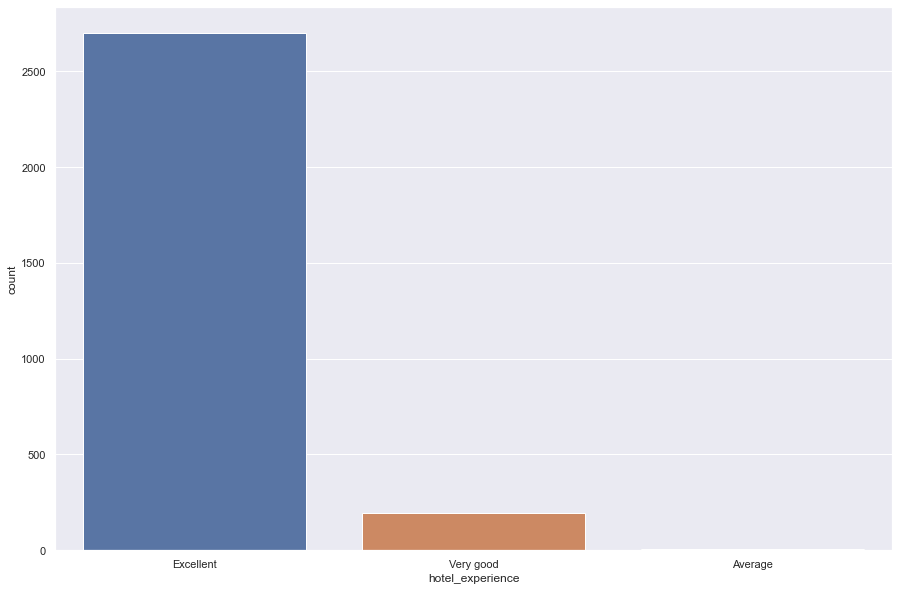

In [129]:
sns.countplot(data=df1, x='hotel_experience')

C:\Users\abdou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


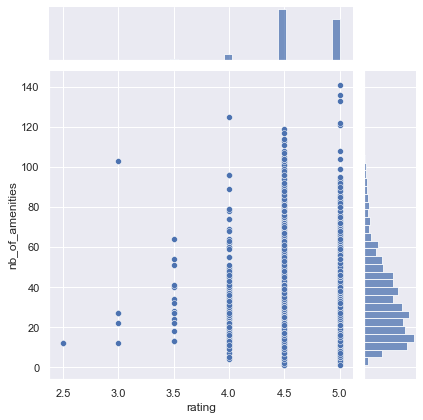

In [130]:
sns.jointplot(df1.rating, df1.nb_of_amenities)

We see that we have correlation between rating and nb amenities. that means that top hotels have more amenities

C:\Users\abdou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


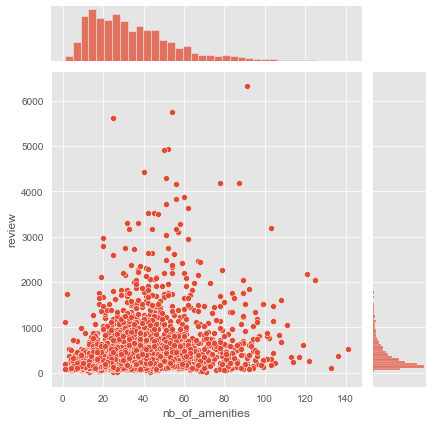

In [62]:
sns.jointplot(df1.nb_of_amenities, df1.review)

<AxesSubplot:>

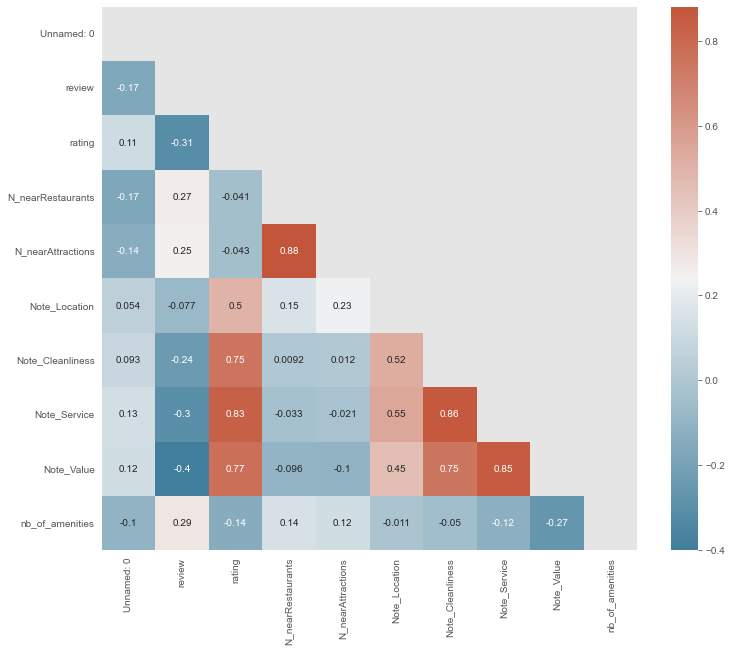

In [77]:
corr = df1.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, mask = np.triu(np.ones_like(corr, dtype=bool)), cmap=sns.diverging_palette(230, 20, as_cmap=True))

### Amenities

In [113]:
def get_table_freq_amenities(df) :
    """

    :param df:
    :return: amenities' table with frequencies
    """
    all_amenities = []
    for row in df.amenities.values:
        a = literal_eval(row)
        all_amenities = all_amenities + a
    frequency_table = {amenity:0 for amenity in set(all_amenities) }
    for amenity in all_amenities:
        frequency_table[amenity] += 1
    d1 = {k: v for k, v in sorted(frequency_table.items(), key=lambda item: item[1], reverse=True)}
    return pd.DataFrame(d1.items(), columns=['amenity', 'nb_hotels'])

In [114]:
df0 = get_table_freq_amenities(df)

<AxesSubplot:xlabel='nb_hotels', ylabel='amenity'>

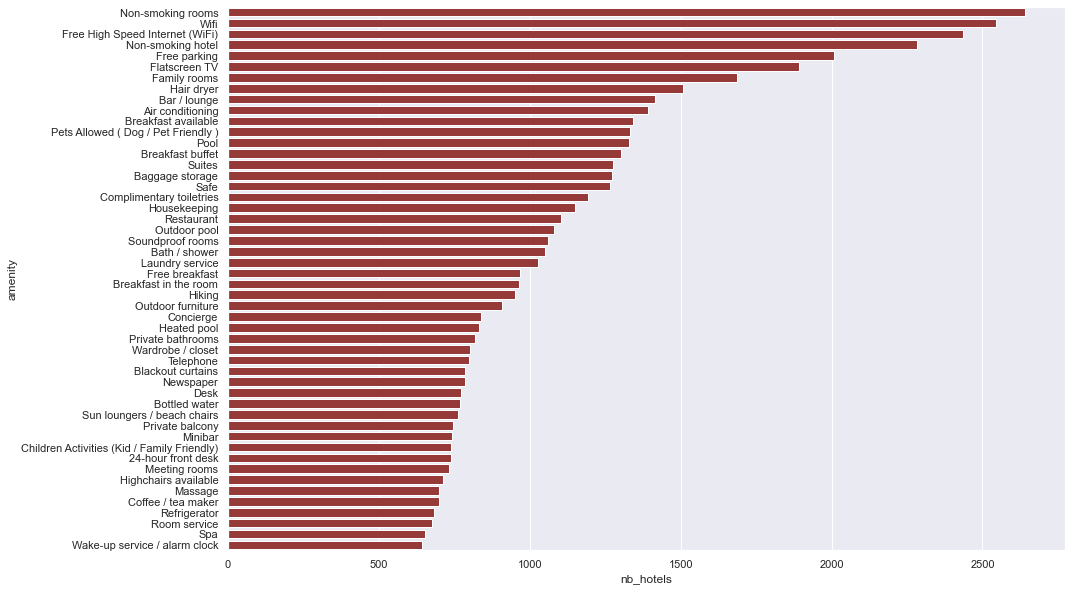

In [116]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data=df0.head(50), x="nb_hotels", y="amenity", color = 'brown')

In [164]:
rating_amenities = df4.groupby('rating').sum().reset_index()
df_amenity = rating_amenities.melt(id_vars=["rating"],
        var_name="amenity",
        value_name="Value")

In [168]:
df_amenity.groupby(['amenity', 'rating']).sum().reset_index()

,amenity,rating,Value
0,"""Children's playground""",2.5,0
1,"""Children's playground""",3.0,1
2,"""Children's playground""",3.5,1
3,"""Children's playground""",4.0,16
4,"""Children's playground""",4.5,116
...,...,...,...
1747,'Wifi',3.0,0
1748,'Wifi',3.5,0
1749,'Wifi',4.0,2
1750,'Wifi',4.5,2


In [203]:
df_amenity.rating.value_counts()

2.5    292
3.0    292
3.5    292
4.0    292
4.5    292
5.0    292
Name: rating, dtype: int64

In [208]:
df4

,rating,"""Children's playground""","""Children's television networks""","""Kids' meals""","""Kids' outdoor play equipment""",'24-hour check-in','24-hour front desk','24-hour security','ATM on site','Additional bathroom',...,'Paid public parking on-site','Paid wifi','Parking garage','Parking','Pets Allowed ( Dog / Pet Friendly )','Pool','Secured parking','Street parking','Valet parking','Wifi'
0,4.5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.5,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.5,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,4.5,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2900,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2901,4.5,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2902,4.5,0,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
a1 = df3.iloc[:,0:74]
a2 = df3.iloc[:,74:147]
a3 = df3.iloc[:,147:220]
a4 = df3.iloc[:,220:293]
a1 = df1[['rating']].join(a1)
a2 = df1[['rating']].join(a2)
a3 = df1[['rating']].join(a3)
a4 = df1[['rating']].join(a4)

In [235]:
def get_melt(df) :
    df = df.groupby('rating').sum().reset_index()
    return df.melt(id_vars=["rating"],
             var_name="amenity",
             value_name="Value")



In [237]:
a1 = get_melt(a1)
a2 = get_melt(a2)
a3 = get_melt(a3)
a4 = get_melt(a4)

In [262]:
import matplotlib.patches as mpatches
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

def plot_amenities(df) :
    """

    :param df:
    :return: plot of amenities
    """

    rating_25 = df[df.rating==2.5]
    rating_3 = df[df.rating==3.0]
    rating_35 = df[df.rating==3.5]
    rating_4 = df[df.rating==4.0]
    rating_45 = df[df.rating==4.5]
    rating_5 = df[df.rating==5.0]
    # set the figure size
    plt.figure(figsize=(14, 14))
    bar1 = sns.barplot(x="Value",  y="amenity", data=rating_5, color='darkblue')
    bar2 = sns.barplot(x="Value", y="amenity", data=rating_45, color='skyblue')
    bar3 = sns.barplot(x="Value",  y="amenity", data=rating_4, color='blue')
    bar4 = sns.barplot(x="Value", y="amenity", data=rating_35, color='plum')
    bar5 = sns.barplot(x="Value",  y="amenity", data=rating_3, color='m')
    bar6 = sns.barplot(x="Value", y="amenity", data=rating_25, color='crimson')



    # add legend
    stack1 = mpatches.Patch(color='darkblue', label='5')
    stack2 = mpatches.Patch(color='skyblue', label='4.5')
    stack3 = mpatches.Patch(color='blue', label='4')
    stack4 = mpatches.Patch(color='plum', label='3.5')
    stack5 = mpatches.Patch(color='m', label='3')
    stack6 = mpatches.Patch(color='crimson', label='25')
    plt.legend(handles=[stack1, stack2,stack3, stack4, stack5, stack6])
    # show the graph
    return plt.show()

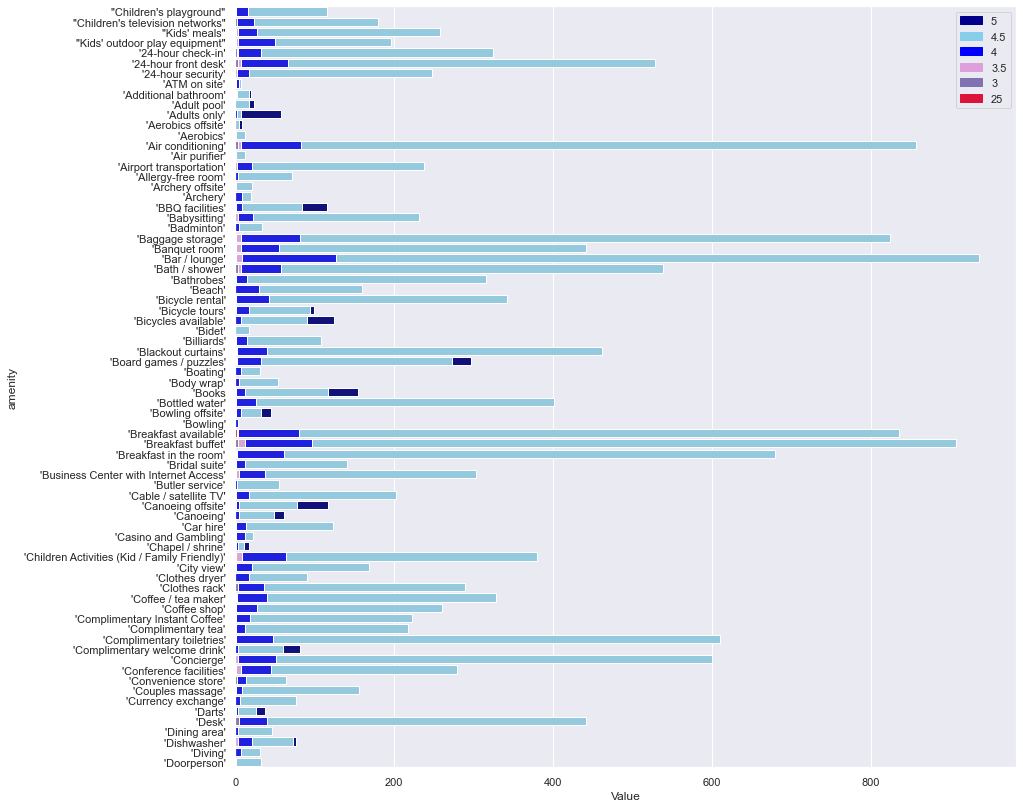

In [263]:
plot_amenities(a1)

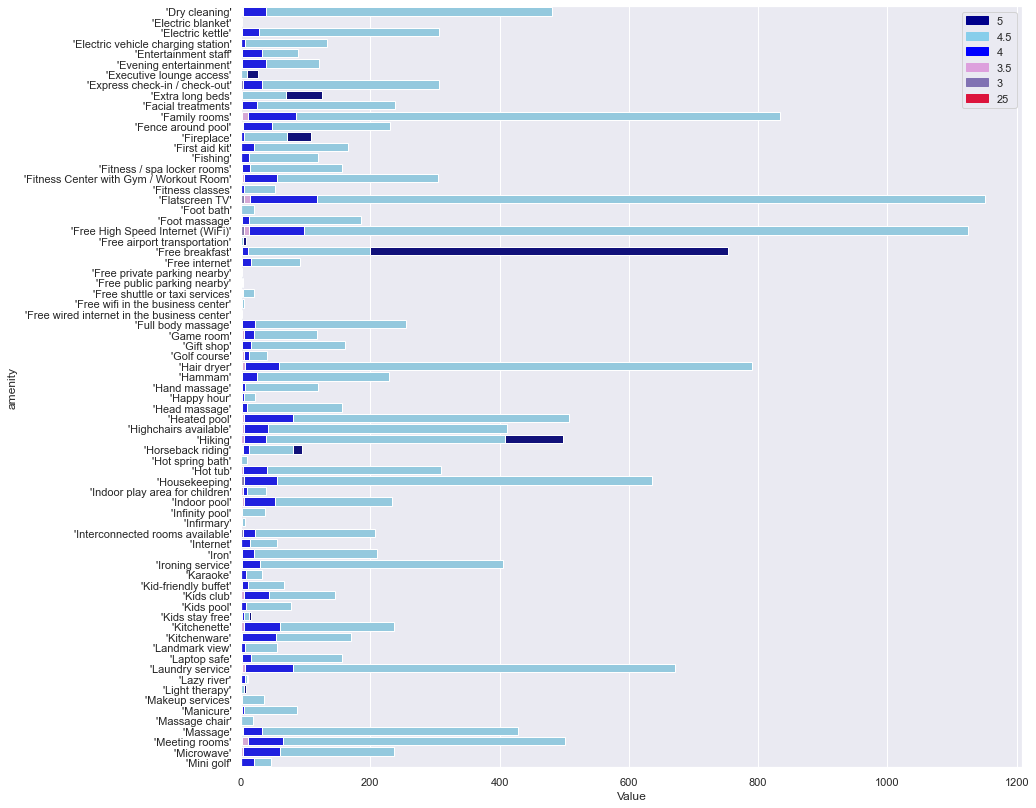

In [252]:
plot_amenities(a2)

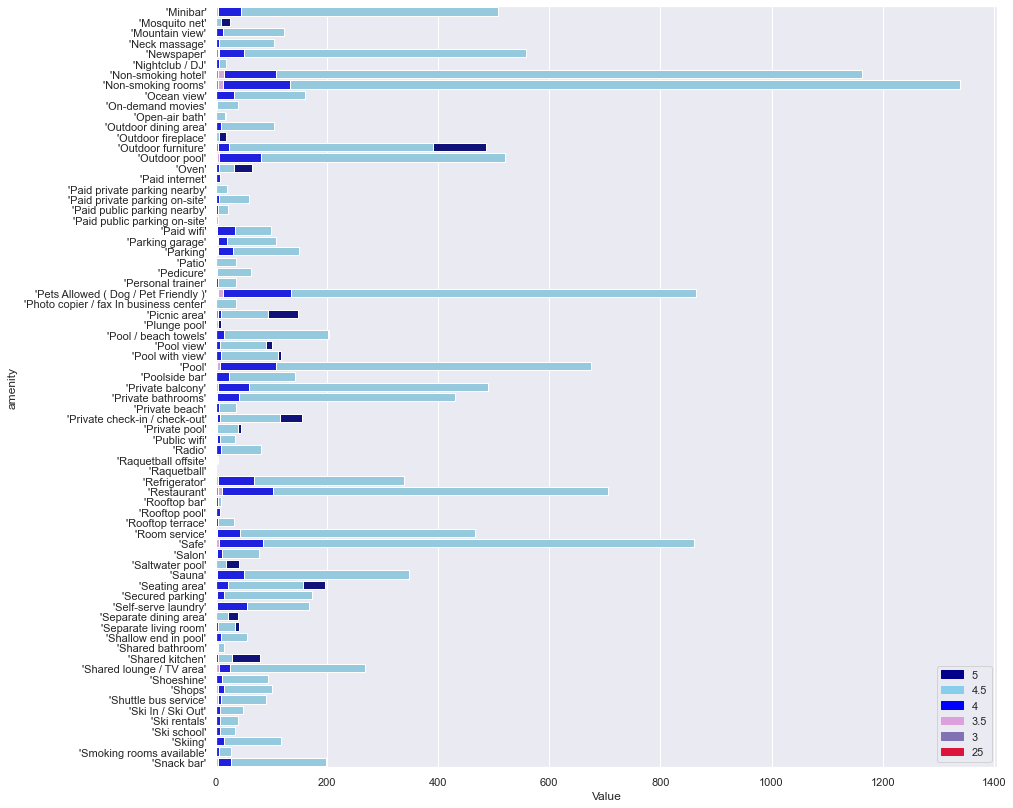

In [256]:
plot_amenities(a3)

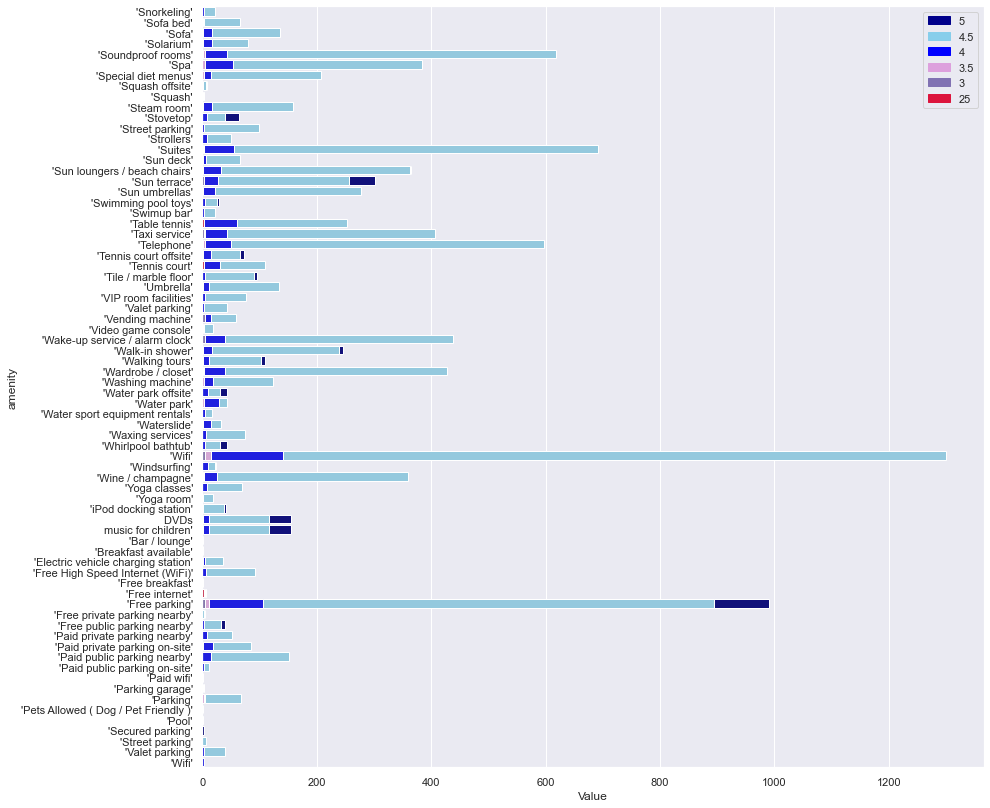

In [257]:
plot_amenities(a4)

In [267]:
df1

,Id,Link,name,address,number,hotel_experience,Price,review,rating,amenities,...,Description,Grade_walkers,N_nearRestaurants,N_nearAttractions,Note_Location,Note_Cleanliness,Note_Service,Note_Value,Src_image,nb_of_amenities
0,0,https://www.tripadvisor.com/Hotel_Review-g2073...,Hotel Saint Guirec et de la Plage,"162 rue de Saint Guirec, 22700, Perros-Guirec ...",NaN,Excellent,€75,619.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,See why so many travelers make Hotel Saint Gui...,75 out of 100,15.0,12.0,4.9,4.4,4.3,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...,24
1,1,https://www.tripadvisor.com/Hotel_Review-g1870...,Le Boutique Hotel & Spa,"3 Rue Lafaurie de Monbadon, 33000, Bordeaux Fr...",0519100370,Excellent,NaN,1291.0,4.5,"'Paid public parking nearby', 'Free High Speed...",...,Le Boutique Hotel Bordeaux is situated in a ma...,100 out of 100,256.0,86.0,4.8,4.7,4.7,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,44
2,2,https://www.tripadvisor.com/Hotel_Review-g9683...,Jiva Hill Resort,"Route d'Haree, 01170 Crozet France",0481922758,Excellent,€235,606.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,Nous avons en effet mis en œuvre et formé nos ...,NaN,NaN,NaN,4.5,4.8,4.5,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,52
3,3,https://www.tripadvisor.com/Hotel_Review-g2192...,Chateau Les Oliviers De Salettes,"1205 route du Chateau, 26450 Charols France",NaN,Excellent,€130,751.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,After three years of renovations and meticulou...,NaN,NaN,NaN,4.7,4.6,4.4,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,32
4,4,https://www.tripadvisor.com/Hotel_Review-g1182...,Best Western Hotel Nuit de Retz,"Rue du Grand Pre Zone de Loisirs, 44710 Port-S...",NaN,Excellent,€90,271.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,Everyone needs a place to lay their weary head...,NaN,NaN,NaN,4.2,4.8,4.7,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,495,https://www.tripadvisor.com/Hotel_Review-g1871...,Hotel Les Mouettes,"9 cours Lucien Bonaparte, 20000 Ajaccio, Commu...",0495504040,Excellent,€140,820.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,Nous suivons de très près l’évolution de l’épi...,56 out of 100,27.0,11.0,4.6,4.8,4.6,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...,107
2900,496,https://www.tripadvisor.com/Hotel_Review-g1872...,Les Messugues,"Allee des Lavandes Impasse des Messugues, 0657...",NaN,Excellent,€100,223.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,The hotel's splendid heated swimming pool and ...,70 out of 100,36.0,17.0,4.5,4.7,4.6,4.4,https://dynamic-media-cdn.tripadvisor.com/medi...,53
2901,497,https://www.tripadvisor.com/Hotel_Review-g5828...,Chateauzen,"303 Route Du Cros Madiere, 30120 Rogues France",0467718538,Excellent,NaN,177.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,"In nature, away from the stress, noise and pol...",NaN,NaN,NaN,4.8,4.5,4.6,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...,98
2902,498,https://www.tripadvisor.com/Hotel_Review-g1872...,Hotel de Paris Saint-Tropez,"1 Traverse de la Gendarmerie, 83990, Saint-Tro...",NaN,Excellent,€391,736.0,4.5,"'Electric vehicle charging station', 'Free Hig...",...,L'Hôtel de Paris Saint-Tropez s'est adjoint l'...,100 out of 100,111.0,20.0,4.9,4.8,4.6,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,96


<AxesSubplot:xlabel='nb_of_amenities', ylabel='review'>

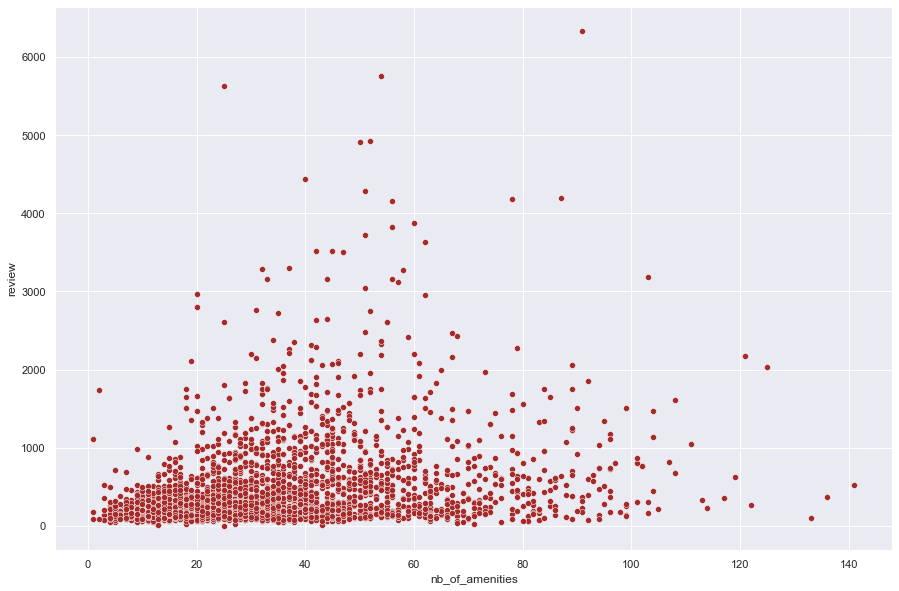

In [276]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=df1, x="nb_of_amenities", y="review", color = 'brown')

In [274]:
df1

,Id,Link,name,address,number,hotel_experience,Price,review,rating,amenities,...,Description,Grade_walkers,N_nearRestaurants,N_nearAttractions,Note_Location,Note_Cleanliness,Note_Service,Note_Value,Src_image,nb_of_amenities
0,0,https://www.tripadvisor.com/Hotel_Review-g2073...,Hotel Saint Guirec et de la Plage,"162 rue de Saint Guirec, 22700, Perros-Guirec ...",NaN,Excellent,€75,619.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,See why so many travelers make Hotel Saint Gui...,75 out of 100,15.0,12.0,4.9,4.4,4.3,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...,24
1,1,https://www.tripadvisor.com/Hotel_Review-g1870...,Le Boutique Hotel & Spa,"3 Rue Lafaurie de Monbadon, 33000, Bordeaux Fr...",0519100370,Excellent,NaN,1291.0,4.5,"'Paid public parking nearby', 'Free High Speed...",...,Le Boutique Hotel Bordeaux is situated in a ma...,100 out of 100,256.0,86.0,4.8,4.7,4.7,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,44
2,2,https://www.tripadvisor.com/Hotel_Review-g9683...,Jiva Hill Resort,"Route d'Haree, 01170 Crozet France",0481922758,Excellent,€235,606.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,Nous avons en effet mis en œuvre et formé nos ...,NaN,NaN,NaN,4.5,4.8,4.5,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,52
3,3,https://www.tripadvisor.com/Hotel_Review-g2192...,Chateau Les Oliviers De Salettes,"1205 route du Chateau, 26450 Charols France",NaN,Excellent,€130,751.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,After three years of renovations and meticulou...,NaN,NaN,NaN,4.7,4.6,4.4,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,32
4,4,https://www.tripadvisor.com/Hotel_Review-g1182...,Best Western Hotel Nuit de Retz,"Rue du Grand Pre Zone de Loisirs, 44710 Port-S...",NaN,Excellent,€90,271.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,Everyone needs a place to lay their weary head...,NaN,NaN,NaN,4.2,4.8,4.7,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,495,https://www.tripadvisor.com/Hotel_Review-g1871...,Hotel Les Mouettes,"9 cours Lucien Bonaparte, 20000 Ajaccio, Commu...",0495504040,Excellent,€140,820.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,Nous suivons de très près l’évolution de l’épi...,56 out of 100,27.0,11.0,4.6,4.8,4.6,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...,107
2900,496,https://www.tripadvisor.com/Hotel_Review-g1872...,Les Messugues,"Allee des Lavandes Impasse des Messugues, 0657...",NaN,Excellent,€100,223.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,The hotel's splendid heated swimming pool and ...,70 out of 100,36.0,17.0,4.5,4.7,4.6,4.4,https://dynamic-media-cdn.tripadvisor.com/medi...,53
2901,497,https://www.tripadvisor.com/Hotel_Review-g5828...,Chateauzen,"303 Route Du Cros Madiere, 30120 Rogues France",0467718538,Excellent,NaN,177.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,"In nature, away from the stress, noise and pol...",NaN,NaN,NaN,4.8,4.5,4.6,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...,98
2902,498,https://www.tripadvisor.com/Hotel_Review-g1872...,Hotel de Paris Saint-Tropez,"1 Traverse de la Gendarmerie, 83990, Saint-Tro...",NaN,Excellent,€391,736.0,4.5,"'Electric vehicle charging station', 'Free Hig...",...,L'Hôtel de Paris Saint-Tropez s'est adjoint l'...,100 out of 100,111.0,20.0,4.9,4.8,4.6,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,96


In [318]:
import geopy
from geopy.geocoders import Nominatim

# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")


df['City'] = np.nan
df['Region'] = np.nan
df['Pays'] = np.nan
df['CP'] = np.nan
for i in range(0, 2905):
    try :
        location = geolocator.geocode(df.address.iloc[i], addressdetails=True)
        address = location.raw['address']
        city = address.get('city', '')
        df.City.iloc[i] = city
        state = address.get('state', '')
        df.Region.iloc[i] = state
        country = address.get('country', '')
        df.Pays.iloc[i] = country
        cp = address.get('postcode')
        df.CP.iloc[i] = cp
    except :
        pass

C:\Users\abdou\AppData\Local\Temp\ipykernel_21628\3118390842.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.City.iloc[i] = city
C:\Users\abdou\AppData\Local\Temp\ipykernel_21628\3118390842.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Region.iloc[i] = state
C:\Users\abdou\AppData\Local\Temp\ipykernel_21628\3118390842.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Pays.iloc[i] = country
C:\Users\abdou\AppData

<AxesSubplot:xlabel='nb_of_amenities', ylabel='Region'>

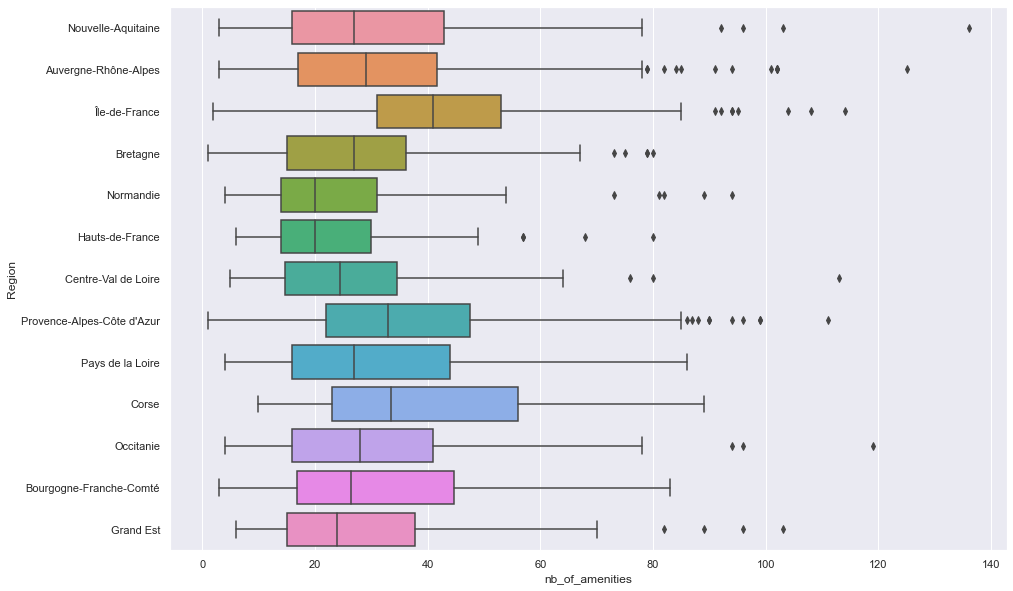

In [331]:
sns.boxplot(data=df1, x="nb_of_amenities", y="Region")

<AxesSubplot:xlabel='nb_of_amenities', ylabel='Region'>

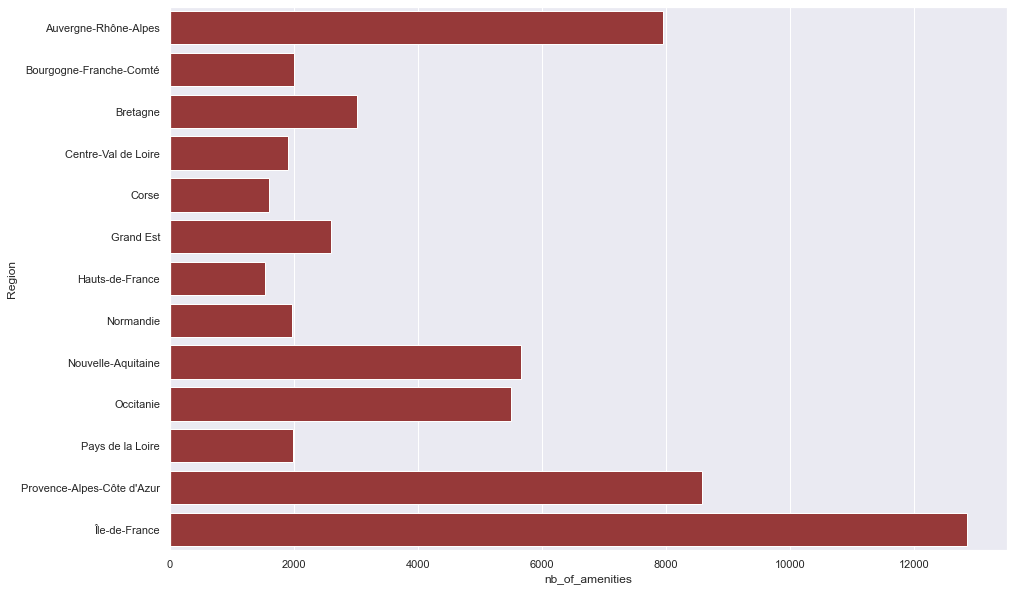

In [333]:
temp = df1.groupby(['Region'])['nb_of_amenities'].sum().reset_index()
sns.barplot(data=temp, x="nb_of_amenities", y="Region", color='brown')

<AxesSubplot:xlabel='review', ylabel='Region'>

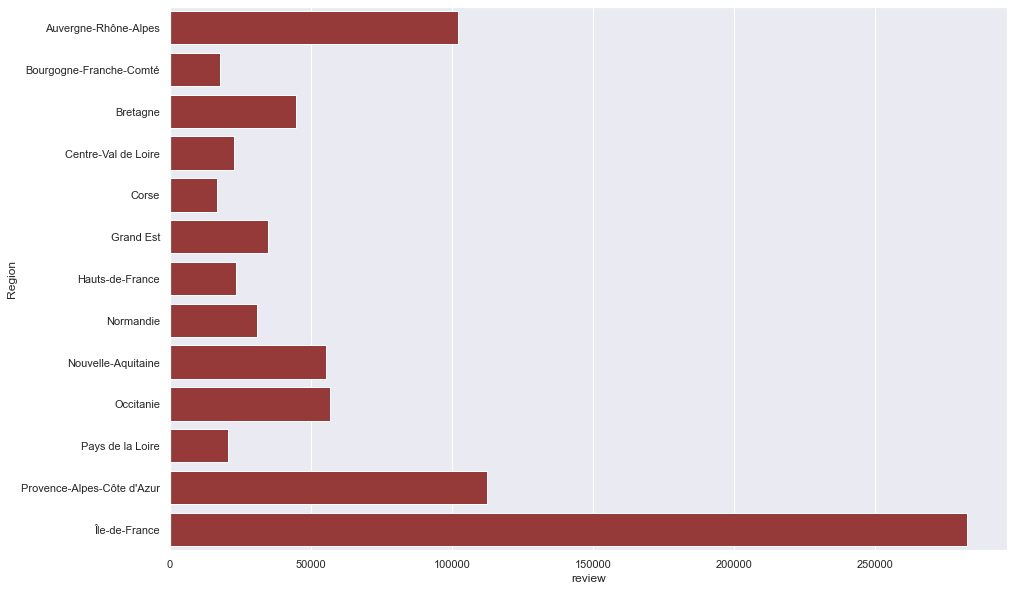

In [335]:
temp = df1.groupby(['Region'])['review'].sum().reset_index()
sns.barplot(data=temp, x="review", y="Region", color='brown')

<AxesSubplot:xlabel='Id', ylabel='Region'>

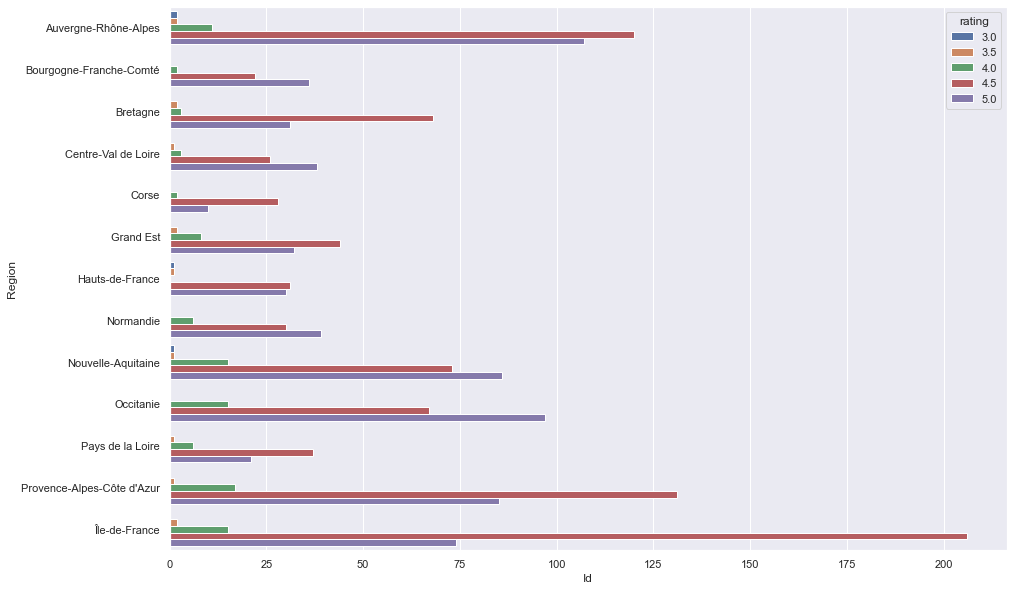

In [344]:
temp = df1.groupby(['Region', 'rating']).count().reset_index()
sns.barplot(data=temp, x="Id", y="Region", hue='rating')

In [345]:
df1

,Id,Link,name,address,number,hotel_experience,Price,review,rating,amenities,...,Grade_walkers,N_nearRestaurants,N_nearAttractions,Note_Location,Note_Cleanliness,Note_Service,Note_Value,Src_image,nb_of_amenities,Region
0,0,https://www.tripadvisor.com/Hotel_Review-g2073...,Hotel Saint Guirec et de la Plage,"162 rue de Saint Guirec, 22700, Perros-Guirec ...",NaN,Excellent,€75,619.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,75 out of 100,15.0,12.0,4.9,4.4,4.3,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...,24,NaN
1,1,https://www.tripadvisor.com/Hotel_Review-g1870...,Le Boutique Hotel & Spa,"3 Rue Lafaurie de Monbadon, 33000, Bordeaux Fr...",0519100370,Excellent,NaN,1291.0,4.5,"'Paid public parking nearby', 'Free High Speed...",...,100 out of 100,256.0,86.0,4.8,4.7,4.7,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,44,Nouvelle-Aquitaine
2,2,https://www.tripadvisor.com/Hotel_Review-g9683...,Jiva Hill Resort,"Route d'Haree, 01170 Crozet France",0481922758,Excellent,€235,606.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,NaN,NaN,NaN,4.5,4.8,4.5,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,52,Auvergne-Rhône-Alpes
3,3,https://www.tripadvisor.com/Hotel_Review-g2192...,Chateau Les Oliviers De Salettes,"1205 route du Chateau, 26450 Charols France",NaN,Excellent,€130,751.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,NaN,NaN,NaN,4.7,4.6,4.4,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,32,Auvergne-Rhône-Alpes
4,4,https://www.tripadvisor.com/Hotel_Review-g1182...,Best Western Hotel Nuit de Retz,"Rue du Grand Pre Zone de Loisirs, 44710 Port-S...",NaN,Excellent,€90,271.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,NaN,NaN,NaN,4.2,4.8,4.7,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...,61,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,495,https://www.tripadvisor.com/Hotel_Review-g1871...,Hotel Les Mouettes,"9 cours Lucien Bonaparte, 20000 Ajaccio, Commu...",0495504040,Excellent,€140,820.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,56 out of 100,27.0,11.0,4.6,4.8,4.6,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...,107,NaN
2900,496,https://www.tripadvisor.com/Hotel_Review-g1872...,Les Messugues,"Allee des Lavandes Impasse des Messugues, 0657...",NaN,Excellent,€100,223.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,70 out of 100,36.0,17.0,4.5,4.7,4.6,4.4,https://dynamic-media-cdn.tripadvisor.com/medi...,53,NaN
2901,497,https://www.tripadvisor.com/Hotel_Review-g5828...,Chateauzen,"303 Route Du Cros Madiere, 30120 Rogues France",0467718538,Excellent,NaN,177.0,4.5,"'Free parking', 'Free High Speed Internet (WiF...",...,NaN,NaN,NaN,4.8,4.5,4.6,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...,98,NaN
2902,498,https://www.tripadvisor.com/Hotel_Review-g1872...,Hotel de Paris Saint-Tropez,"1 Traverse de la Gendarmerie, 83990, Saint-Tro...",NaN,Excellent,€391,736.0,4.5,"'Electric vehicle charging station', 'Free Hig...",...,100 out of 100,111.0,20.0,4.9,4.8,4.6,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,96,Provence-Alpes-Côte d'Azur


## Comprehensive data exploration
 After scarping data from tripadvisor about all hotel in France, we are going to explore and clean this data.


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from PIL import Image
from ast import literal_eval

In [91]:
data = pd.read_excel('data_All_Hotels_France.xlsx',)

In [92]:
data.head()

,Unnamed: 0,Link,name,address,number,hotel_experience,Price,review,rating,amenities,rank,Description,Grade_walkers,N_nearRestaurants,N_nearAttractions,Note_Location,Note_Cleanliness,Note_Service,Note_Value,Src_image
0,0,https://www.tripadvisor.com/Hotel_Review-g2073...,Hotel Saint Guirec et de la Plage,"162 rue de Saint Guirec, 22700, Perros-Guirec ...",None,Excellent,€75,619 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#4 of 24 hotels in Perros-Guirec,See why so many travelers make Hotel Saint Gui...,75 out of 100,15,12,4.9,4.4,4.3,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...
1,1,https://www.tripadvisor.com/Hotel_Review-g1870...,Le Boutique Hotel & Spa,"3 Rue Lafaurie de Monbadon, 33000, Bordeaux Fr...",0519100370,Excellent,NaN,"1,291 reviews",4.5,"['Paid public parking nearby', 'Free High Spee...",#9 of 194 hotels in Bordeaux,Le Boutique Hotel Bordeaux is situated in a ma...,100 out of 100,256,86,4.8,4.7,4.7,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...
2,2,https://www.tripadvisor.com/Hotel_Review-g9683...,Jiva Hill Resort,"Route d'Haree, 01170 Crozet France",0481922758,Excellent,€235,606 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#1 of 2 hotels in Crozet,Nous avons en effet mis en œuvre et formé nos ...,None,None,None,4.5,4.8,4.5,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...
3,3,https://www.tripadvisor.com/Hotel_Review-g2192...,Chateau Les Oliviers De Salettes,"1205 route du Chateau, 26450 Charols France",None,Excellent,€130,751 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",None,After three years of renovations and meticulou...,None,None,None,4.7,4.6,4.4,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...
4,4,https://www.tripadvisor.com/Hotel_Review-g1182...,Best Western Hotel Nuit de Retz,"Rue du Grand Pre Zone de Loisirs, 44710 Port-S...",None,Excellent,€90,271 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#1 of 3 B&Bs / Inns in Port-Saint-Pere,Everyone needs a place to lay their weary head...,None,None,None,4.2,4.8,4.7,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2904 non-null   int64  
 1   Link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             2904 non-null   object 
 5   hotel_experience   2904 non-null   object 
 6   Price              1219 non-null   object 
 7   review             2904 non-null   object 
 8   rating             2904 non-null   object 
 9   amenities          2904 non-null   object 
 10  rank               2904 non-null   object 
 11  Description        2902 non-null   object 
 12  Grade_walkers      2904 non-null   object 
 13  N_nearRestaurants  2904 non-null   object 
 14  N_nearAttractions  2904 non-null   object 
 15  Note_Location      2901 non-null   float64
 16  Note_Cleanliness   2900 

In [94]:
data.N_nearAttractions.value_counts()

None    1405
4         90
6         86
3         75
5         70
        ... 
206        1
170        1
182        1
248        1
183        1
Name: N_nearAttractions, Length: 171, dtype: int64

In [95]:
data.Note_Cleanliness.value_counts()

4.9    626
4.8    612
5.0    407
4.7    402
4.6    296
4.5    224
4.4     99
4.3     74
4.2     66
4.1     32
4.0     31
3.9     10
3.7      6
3.8      3
3.5      3
3.3      3
3.6      2
3.4      2
3.0      2
Name: Note_Cleanliness, dtype: int64

## Variable name

In [5]:
data.columns

Index(['Unnamed: 0', 'Link', 'name', 'address', 'number', 'hotel_experience',
       'Price', 'review', 'rating', 'amenities', 'rank', 'Description',
       'Grade_walkers', 'N_nearRestaurants', 'N_nearAttractions',
       'Note_Location', 'Note_Cleanliness', 'Note_Service', 'Note_Value',
       'Src_image'],
      dtype='object')

In [6]:
name_map = {col_name:col_name.lower() for col_name in data.columns  }

In [7]:
name_map

{'Unnamed: 0': 'unnamed: 0',
 'Link': 'link',
 'name': 'name',
 'address': 'address',
 'number': 'number',
 'hotel_experience': 'hotel_experience',
 'Price': 'price',
 'review': 'review',
 'rating': 'rating',
 'amenities': 'amenities',
 'rank': 'rank',
 'Description': 'description',
 'Grade_walkers': 'grade_walkers',
 'N_nearRestaurants': 'n_nearrestaurants',
 'N_nearAttractions': 'n_nearattractions',
 'Note_Location': 'note_location',
 'Note_Cleanliness': 'note_cleanliness',
 'Note_Service': 'note_service',
 'Note_Value': 'note_value',
 'Src_image': 'src_image'}

In [8]:
name_map['Unnamed: 0'] = 'hotel_id'

In [9]:
data.rename(name_map, axis=1, inplace=True)

## Variable type

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           2904 non-null   int64  
 1   link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             2904 non-null   object 
 5   hotel_experience   2904 non-null   object 
 6   price              1219 non-null   object 
 7   review             2904 non-null   object 
 8   rating             2904 non-null   object 
 9   amenities          2904 non-null   object 
 10  rank               2904 non-null   object 
 11  description        2902 non-null   object 
 12  grade_walkers      2904 non-null   object 
 13  n_nearrestaurants  2904 non-null   object 
 14  n_nearattractions  2904 non-null   object 
 15  note_location      2901 non-null   float64
 16  note_cleanliness   2900 

### Missing values
replace `None` by `np.nan`,

In [11]:
data.replace('None',np.nan, inplace=True)

### Price
clean the price by deleting to euro sign and conveting column type to `float`

In [12]:
data.price = data.price.str.replace('€', '').str.replace(',', '').astype(float)

### Review
This repsent the numbers of reviews that hotel had get

In [13]:
data[~data.review.isnull()].review.apply(lambda x:x.split(' ')[0].strip().replace(',', '')).astype(int)

0        619
1       1291
2        606
3        751
4        271
        ... 
2899     820
2900     223
2901     177
2902     736
2903     369
Name: review, Length: 2903, dtype: int32

In [14]:
data.loc[~data.review.isnull(), 'review'] = data[~data.review.isnull()].review.apply(lambda x:x.split(' ')[0].strip().replace(',', '')).astype(int)

In [15]:
mean_reviw = data.review.mean()

In [16]:
int(mean_reviw)

465

In [17]:
data.review = data.review.fillna(int(mean_reviw))

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           2904 non-null   int64  
 1   link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             523 non-null    object 
 5   hotel_experience   2903 non-null   object 
 6   price              1219 non-null   float64
 7   review             2904 non-null   int64  
 8   rating             2903 non-null   object 
 9   amenities          2904 non-null   object 
 10  rank               2526 non-null   object 
 11  description        2880 non-null   object 
 12  grade_walkers      1499 non-null   object 
 13  n_nearrestaurants  1499 non-null   object 
 14  n_nearattractions  1499 non-null   object 
 15  note_location      2901 non-null   float64
 16  note_cleanliness   2900 

### Rating

In [19]:
data.rating.value_counts(dropna=False)

4.5    1335
5      1058
4       171
5.0     157
4.5     152
3.5      16
4.0       7
3         5
2.5       2
NaN       1
Name: rating, dtype: int64

In [20]:
data.rating.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2904 entries, 0 to 2903
Series name: rating
Non-Null Count  Dtype 
--------------  ----- 
2903 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


In [21]:
data.rating = data.rating.astype(float)

### Grade walkers

In [22]:
data.grade_walkers

0         75 out of 100
1        100 out of 100
2                   NaN
3                   NaN
4                   NaN
             ...       
2899      56 out of 100
2900      70 out of 100
2901                NaN
2902     100 out of 100
2903      48 out of 100
Name: grade_walkers, Length: 2904, dtype: object

In [23]:
data.grade_walkers.value_counts(dropna=False)

NaN                1405
 100 out of 100     519
 86 out of 100       26
 85 out of 100       25
 84 out of 100       24
                   ... 
 92 out of 100        9
 79 out of 100        8
 43 out of 100        8
 95 out of 100        7
 56 out of 100        7
Name: grade_walkers, Length: 66, dtype: int64

In [24]:
data[~data.grade_walkers.isnull()].grade_walkers

0         75 out of 100
1        100 out of 100
5        100 out of 100
6        100 out of 100
7        100 out of 100
             ...       
2897      77 out of 100
2899      56 out of 100
2900      70 out of 100
2902     100 out of 100
2903      48 out of 100
Name: grade_walkers, Length: 1499, dtype: object

In [25]:
data[~data.grade_walkers.isnull()].grade_walkers.apply(lambda x: x.strip().split(' ')[0])

0        75
1       100
5       100
6       100
7       100
       ... 
2897     77
2899     56
2900     70
2902    100
2903     48
Name: grade_walkers, Length: 1499, dtype: object

In [26]:
data.loc[~data.grade_walkers.isnull(), 'grade_walkers'] = data[~data.grade_walkers.isnull()].grade_walkers.apply(lambda x: x.strip().split(' ')[0])

In [27]:
data.grade_walkers.value_counts(dropna=False)

NaN    1405
100     519
86       26
85       25
84       24
       ... 
92        9
79        8
43        8
95        7
56        7
Name: grade_walkers, Length: 66, dtype: int64

In [28]:
data.grade_walkers = data.grade_walkers.astype(float)

### Amenities

word cloud for amenities

In [29]:
data.amenities

0       ['Free parking', 'Free High Speed Internet (Wi...
1       ['Paid public parking nearby', 'Free High Spee...
2       ['Free parking', 'Free High Speed Internet (Wi...
3       ['Free parking', 'Free High Speed Internet (Wi...
4       ['Free parking', 'Free High Speed Internet (Wi...
                              ...                        
2899    ['Free parking', 'Free High Speed Internet (Wi...
2900    ['Free parking', 'Free High Speed Internet (Wi...
2901    ['Free parking', 'Free High Speed Internet (Wi...
2902    ['Electric vehicle charging station', 'Free Hi...
2903    ['Free parking', 'Free High Speed Internet (Wi...
Name: amenities, Length: 2904, dtype: object

In [31]:
data.amenities.str.join(sep='')

0       ['Free parking', 'Free High Speed Internet (Wi...
1       ['Paid public parking nearby', 'Free High Spee...
2       ['Free parking', 'Free High Speed Internet (Wi...
3       ['Free parking', 'Free High Speed Internet (Wi...
4       ['Free parking', 'Free High Speed Internet (Wi...
                              ...                        
2899    ['Free parking', 'Free High Speed Internet (Wi...
2900    ['Free parking', 'Free High Speed Internet (Wi...
2901    ['Free parking', 'Free High Speed Internet (Wi...
2902    ['Electric vehicle charging station', 'Free Hi...
2903    ['Free parking', 'Free High Speed Internet (Wi...
Name: amenities, Length: 2904, dtype: object

In [32]:
' '.join(literal_eval(data.amenities[0]))

"Free parking Free High Speed Internet (WiFi) Bar / lounge Beach Hiking Pets Allowed ( Dog / Pet Friendly ) Baggage storage Non-smoking hotel Wifi Restaurant Breakfast buffet Breakfast in the room Kids' meals Shared lounge / TV area Express check-in / check-out Soundproof rooms Safe Telephone Wake-up service / alarm clock Flatscreen TV Hair dryer Ocean view Non-smoking rooms Family rooms"

In [33]:
text = data.amenities.apply(lambda x: ' '.join(literal_eval(x))).str.cat()

In [34]:
wordcloud = WordCloud().generate(text)

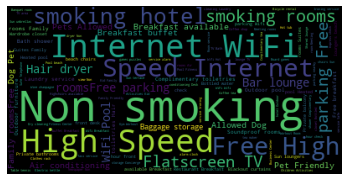

In [35]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Frequency Tables

In [36]:
all_amenities = []

In [37]:
for row in data.amenities.values:

    a = literal_eval(row)
    all_amenities = all_amenities + a

In [38]:
all_amenities

['Free parking',
 'Free High Speed Internet (WiFi)',
 'Bar / lounge',
 'Beach',
 'Hiking',
 'Pets Allowed ( Dog / Pet Friendly )',
 'Baggage storage',
 'Non-smoking hotel',
 'Wifi',
 'Restaurant',
 'Breakfast buffet',
 'Breakfast in the room',
 "Kids' meals",
 'Shared lounge / TV area',
 'Express check-in / check-out',
 'Soundproof rooms',
 'Safe',
 'Telephone',
 'Wake-up service / alarm clock',
 'Flatscreen TV',
 'Hair dryer',
 'Ocean view',
 'Non-smoking rooms',
 'Family rooms',
 'Paid public parking nearby',
 'Free High Speed Internet (WiFi)',
 'Hot tub',
 'Bar / lounge',
 'Babysitting',
 'Pets Allowed ( Dog / Pet Friendly )',
 'Taxi service',
 'Spa',
 'Parking',
 'Wifi',
 'Coffee shop',
 'Restaurant',
 'Breakfast available',
 'Breakfast buffet',
 'Breakfast in the room',
 'Wine / champagne',
 'Massage',
 'Concierge',
 'Non-smoking hotel',
 '24-hour check-in',
 '24-hour front desk',
 'Dry cleaning',
 'Laundry service',
 'Soundproof rooms',
 'Bathrobes',
 'Air conditioning',
 'Desk',

In [39]:
len(all_amenities)

98291

In [40]:
len(set(all_amenities))

269

In [41]:
frquency_talbles = {amentie:0 for amentie in set(all_amenities) }

In [42]:
for amentie in all_amenities:
    frquency_talbles[amentie] += 1

In [43]:
frquency_talbles

{'Breakfast in the room': 965,
 'Kitchenware': 372,
 'Sauna': 561,
 'Walking tours': 225,
 'Bridal suite': 270,
 'Archery offsite': 36,
 'Private pool': 90,
 'Blackout curtains': 784,
 'Pool with view': 240,
 'Dry cleaning': 633,
 'Windsurfing': 53,
 'Restaurant': 1105,
 'Wine / champagne': 641,
 'Fishing': 243,
 'Separate living room': 78,
 'Hot tub': 641,
 'Badminton': 67,
 'Kitchenette': 526,
 'Hand massage': 203,
 'Kids pool': 102,
 'Raquetball': 1,
 'Neck massage': 172,
 'Bicycle tours': 213,
 'Parking garage': 243,
 'Special diet menus': 398,
 'Highchairs available': 713,
 'Rooftop bar': 15,
 '24-hour check-in': 446,
 'Raquetball offsite': 6,
 'Public wifi': 59,
 'Banquet room': 609,
 'On-demand movies': 61,
 'Skiing': 222,
 "Kids' meals": 390,
 'Business Center with Internet Access': 409,
 'Game room': 214,
 'Ski school': 65,
 'Swimup bar': 27,
 'Clothes rack': 602,
 'Mini golf': 85,
 'Gift shop': 250,
 'Dining area': 91,
 'Non-smoking hotel': 2283,
 'Bottled water': 768,
 'Vide

In [44]:
sorter_frequency_table = {k: v for k, v in sorted(frquency_talbles.items(), key=lambda item: item[1], reverse=True)}

In [45]:
sorter_frequency_table

{'Non-smoking rooms': 2641,
 'Wifi': 2544,
 'Free High Speed Internet (WiFi)': 2437,
 'Non-smoking hotel': 2283,
 'Free parking': 2009,
 'Flatscreen TV': 1891,
 'Family rooms': 1688,
 'Hair dryer': 1509,
 'Bar / lounge': 1415,
 'Air conditioning': 1391,
 'Breakfast available': 1341,
 'Pets Allowed ( Dog / Pet Friendly )': 1333,
 'Pool': 1328,
 'Breakfast buffet': 1302,
 'Suites': 1276,
 'Baggage storage': 1274,
 'Safe': 1267,
 'Complimentary toiletries': 1193,
 'Housekeeping': 1151,
 'Restaurant': 1105,
 'Outdoor pool': 1081,
 'Soundproof rooms': 1059,
 'Bath / shower': 1050,
 'Laundry service': 1026,
 'Free breakfast': 967,
 'Breakfast in the room': 965,
 'Hiking': 951,
 'Outdoor furniture': 908,
 'Concierge': 840,
 'Heated pool': 831,
 'Private bathrooms': 820,
 'Wardrobe / closet': 801,
 'Telephone': 799,
 'Blackout curtains': 784,
 'Newspaper': 784,
 'Desk': 771,
 'Bottled water': 768,
 'Sun loungers / beach chairs': 762,
 'Private balcony': 747,
 'Minibar': 741,
 '24-hour front de

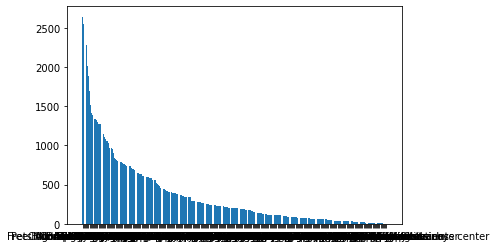

In [46]:
plt.bar(*zip(*sorter_frequency_table.items()))
plt.show()

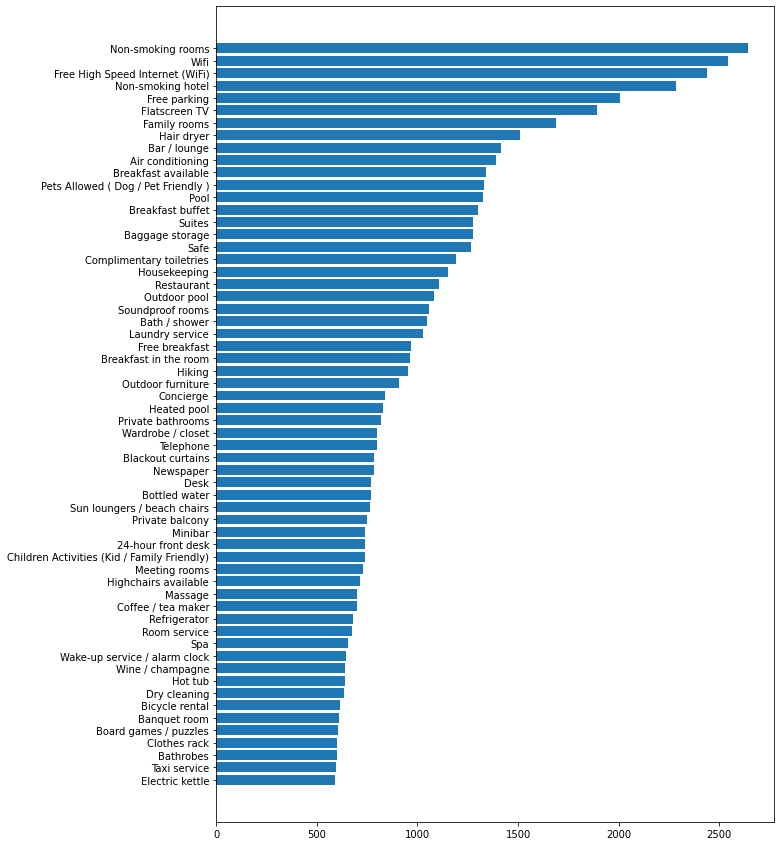

In [47]:
M = 60
plt.figure(figsize=(10,15))
values = list(sorter_frequency_table.values())[:M]
keys = list(sorter_frequency_table.keys())[:M]
plt.barh(range(M), values[::-1], align='center')
plt.yticks(range(M),keys[::-1],rotation=0)

plt.show()

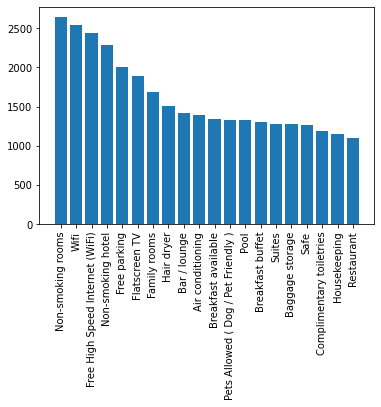

In [48]:
M = 20
values = list(sorter_frequency_table.values())[:M]
keys = list(sorter_frequency_table.keys())[:M]
plt.bar(range(M), values, align='center')
plt.xticks(range(M),keys,rotation=90)

plt.show()

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           2904 non-null   int64  
 1   link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             523 non-null    object 
 5   hotel_experience   2903 non-null   object 
 6   price              1219 non-null   float64
 7   review             2904 non-null   int64  
 8   rating             2903 non-null   float64
 9   amenities          2904 non-null   object 
 10  rank               2526 non-null   object 
 11  description        2880 non-null   object 
 12  grade_walkers      1499 non-null   float64
 13  n_nearrestaurants  1499 non-null   object 
 14  n_nearattractions  1499 non-null   object 
 15  note_location      2901 non-null   float64
 16  note_cleanliness   2900 

### n_nearresturants

In [50]:
data.n_nearrestaurants.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2904 entries, 0 to 2903
Series name: n_nearrestaurants
Non-Null Count  Dtype 
--------------  ----- 
1499 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


In [51]:
data.n_nearrestaurants = data.n_nearrestaurants.astype(float)

### n_nearattractions

In [52]:
data.n_nearattractions = data.n_nearattractions.astype(float)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           2904 non-null   int64  
 1   link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             523 non-null    object 
 5   hotel_experience   2903 non-null   object 
 6   price              1219 non-null   float64
 7   review             2904 non-null   int64  
 8   rating             2903 non-null   float64
 9   amenities          2904 non-null   object 
 10  rank               2526 non-null   object 
 11  description        2880 non-null   object 
 12  grade_walkers      1499 non-null   float64
 13  n_nearrestaurants  1499 non-null   float64
 14  n_nearattractions  1499 non-null   float64
 15  note_location      2901 non-null   float64
 16  note_cleanliness   2900 

## Correlation matrix (heatmap style)

<AxesSubplot:>

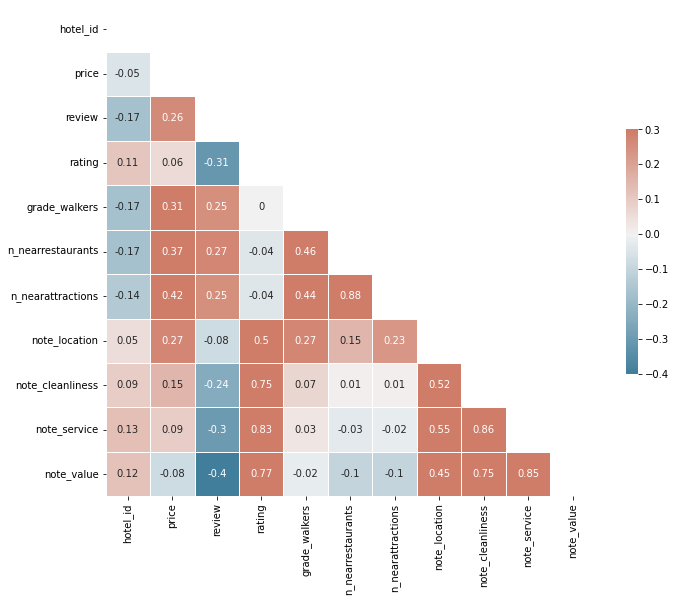

In [56]:
# Compute the correlation matrix
corr = data.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [57]:
note_avg = (data.note_cleanliness + data.note_location + data.note_service + data.note_value)/4

In [59]:
note_avg.round(2)

0       4.43
1       4.60
2       4.50
3       4.48
4       4.57
        ... 
2899    4.52
2900    4.55
2901    4.62
2902    4.62
2903    4.65
Length: 2904, dtype: float64

In [60]:
data['note_avg'] = note_avg.round(2)

<AxesSubplot:xlabel='note_avg', ylabel='rating'>

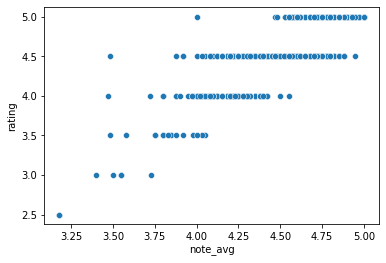

In [61]:
sns.scatterplot(data=data, x="note_avg", y="rating")

C:\Users\BAAMARA\AppData\Local\Temp\ipykernel_6868\1865291446.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.note_avg)


<AxesSubplot:xlabel='note_avg', ylabel='Density'>

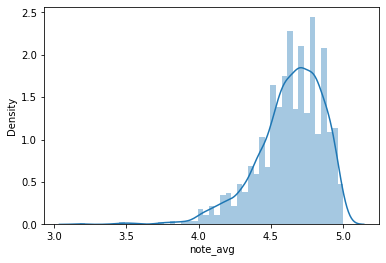

In [63]:
sns.distplot(data.note_avg)

C:\Users\BAAMARA\AppData\Local\Temp\ipykernel_6868\2693423374.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.rating)


<AxesSubplot:xlabel='rating', ylabel='Density'>

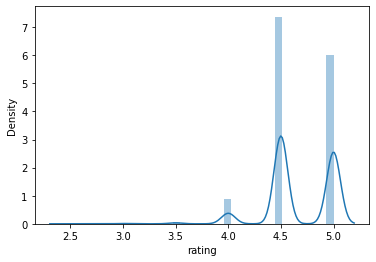

In [64]:
sns.distplot(data.rating)

In [66]:
data[['note_avg', 'rating']].corr()

,note_avg,rating
note_avg,1.000000,0.829678
rating,0.829678,1.000000


In [70]:
def discretize(x):
    '''
    discretize the note avg value to match the rating values
    :param note:
    :return:
    '''
    if x < 3 :
        return 2.5
    elif x <3.5:
        return 3
    elif x <4:
        return 3.5
    elif x <4.5:
        return 4
    elif x <5:
        return 4.5
    elif x >=5:
        return 5

In [73]:
note_avg_discrete = data.note_avg.apply(lambda x: discretize(x))

In [74]:
data['note_avg_discrete'] = note_avg_discrete

<AxesSubplot:xlabel='note_avg_discrete', ylabel='rating'>

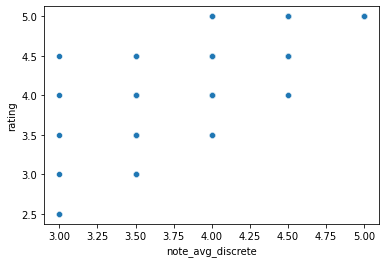

In [75]:
sns.scatterplot(data=data, x="note_avg_discrete", y="rating")

In [76]:
data[['note_avg_discrete', 'rating']].corr()

,note_avg_discrete,rating
note_avg_discrete,1.000000,0.616702
rating,0.616702,1.000000


C:\Users\BAAMARA\AppData\Local\Temp\ipykernel_6868\2986378563.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.note_avg_discrete)


<AxesSubplot:xlabel='note_avg_discrete', ylabel='Density'>

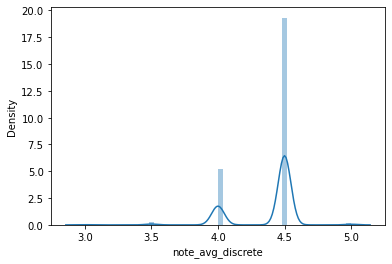

In [77]:
sns.distplot(data.note_avg_discrete)

C:\Users\BAAMARA\AppData\Local\Temp\ipykernel_6868\1914910155.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.rating)


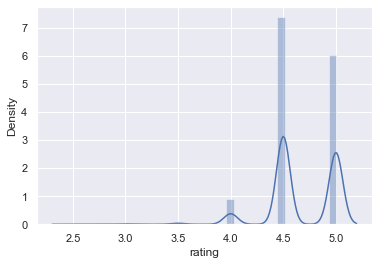

In [89]:
sns.distplot(data.rating)
plt.show()

D:\WORK_DATA\rapport mensuelles\venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


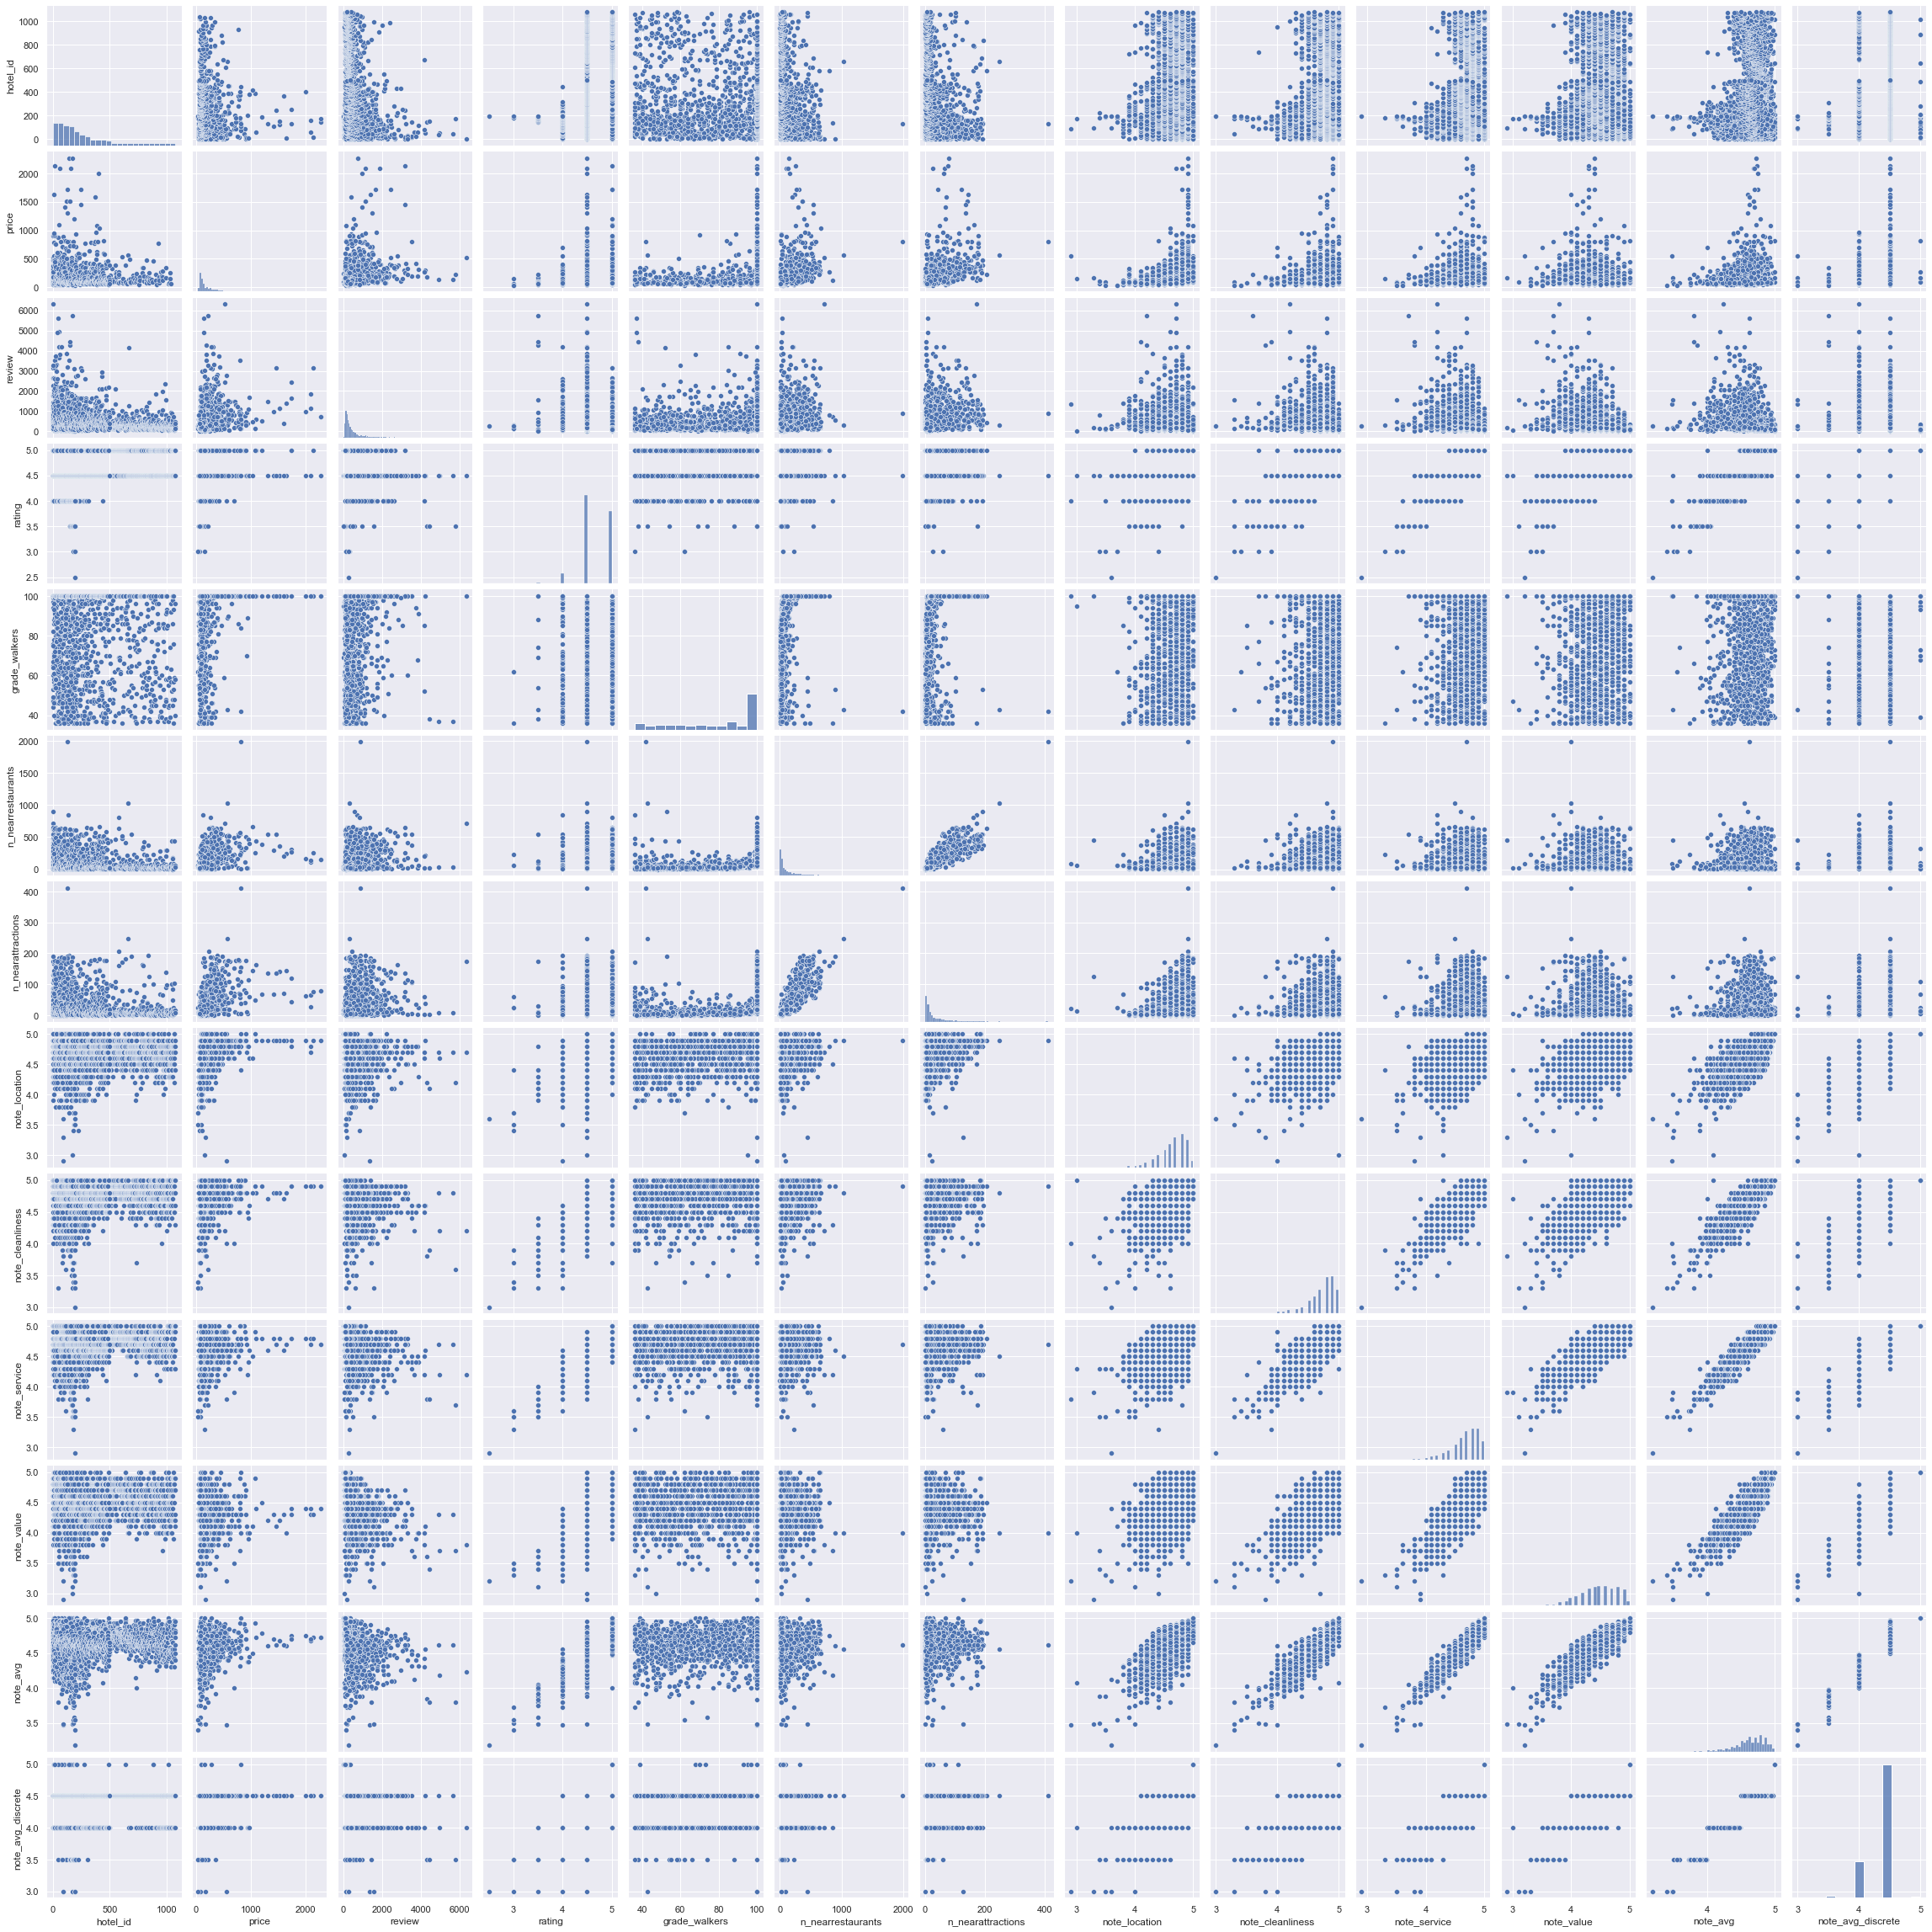

In [78]:
#scatterplot
sns.set()

#cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data, size = 2.5)
plt.show()

D:\WORK_DATA\rapport mensuelles\venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


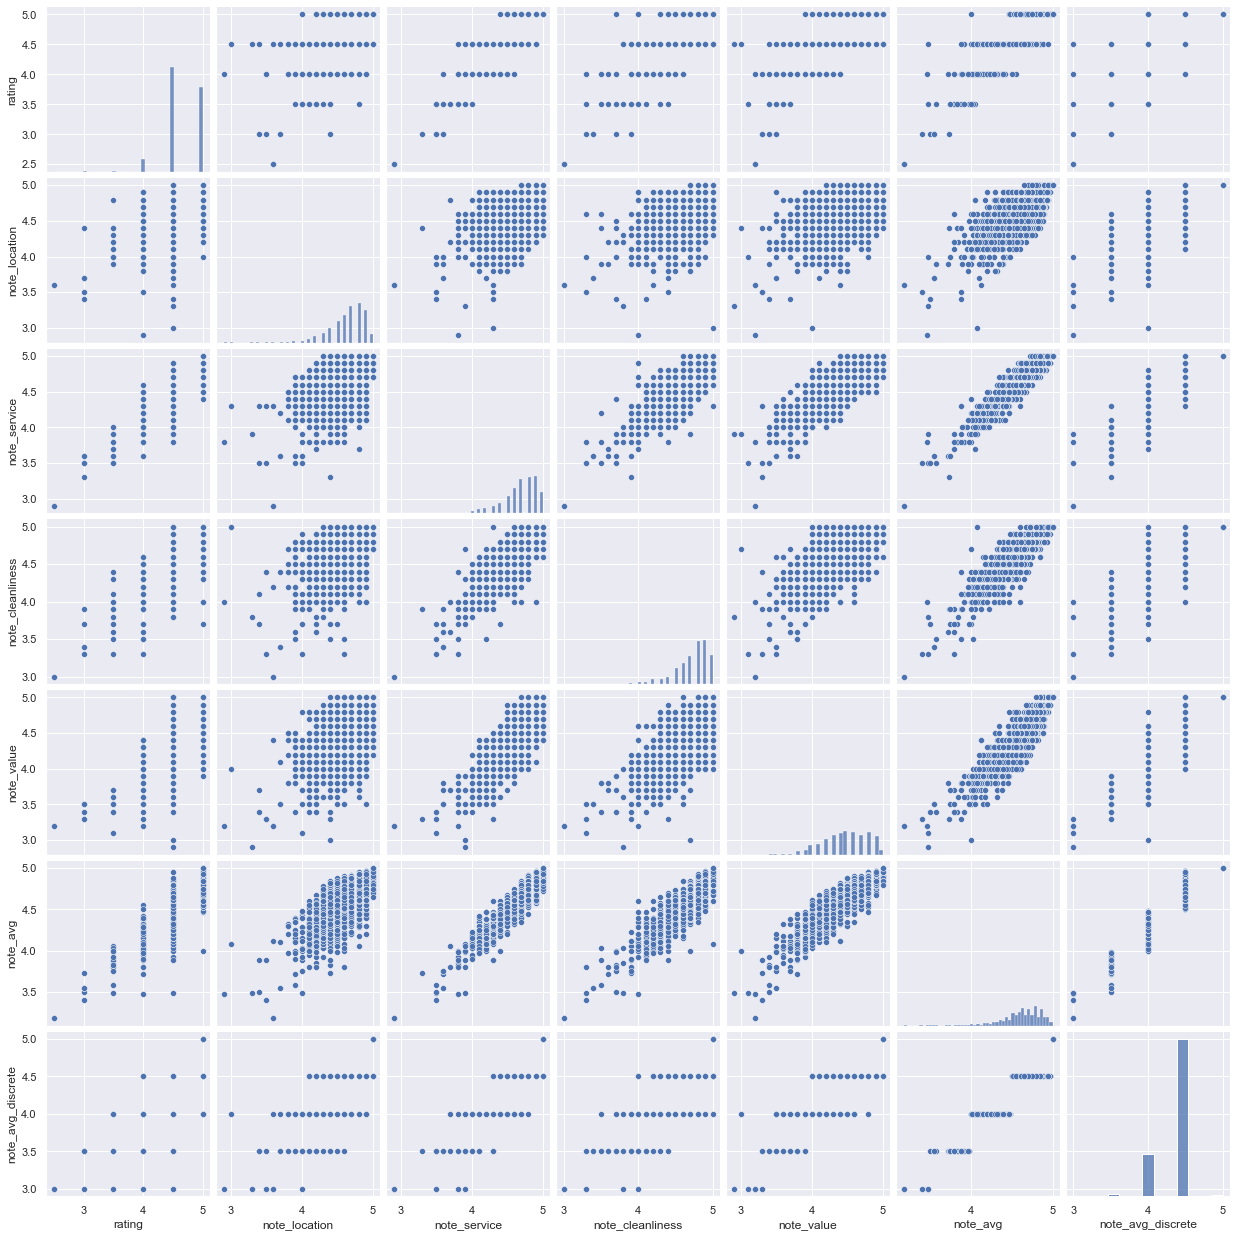

In [79]:
cols = ['rating', 'note_location', 'note_service', 'note_cleanliness', 'note_value', 'note_avg', 'note_avg_discrete']
#scatterplot
sns.set()


sns.pairplot(data[cols], size = 2.5)
plt.show()

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           2904 non-null   int64  
 1   link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             523 non-null    object 
 5   hotel_experience   2903 non-null   object 
 6   price              1219 non-null   float64
 7   review             2904 non-null   int64  
 8   rating             2903 non-null   float64
 9   amenities          2904 non-null   object 
 10  rank               2526 non-null   object 
 11  description        2880 non-null   object 
 12  grade_walkers      1499 non-null   float64
 13  n_nearrestaurants  1499 non-null   float64
 14  n_nearattractions  1499 non-null   float64
 15  note_location      2901 non-null   float64
 16  note_cleanliness   2900 

In [83]:
data[~data.isnull().any(axis = 1)].corr()

,hotel_id,price,review,rating,grade_walkers,n_nearrestaurants,n_nearattractions,note_location,note_cleanliness,note_service,note_value,note_avg,note_avg_discrete
hotel_id,1.000000,-0.067042,-0.132390,-0.167648,-0.063041,-0.118967,-0.004646,-0.021488,-0.131421,-0.154610,-0.194628,-0.149825,-0.099191
price,-0.067042,1.000000,0.166050,0.119863,0.272740,0.206618,0.280293,0.200419,0.207521,0.125016,-0.017166,0.144382,0.113860
review,-0.132390,0.166050,1.000000,-0.177162,0.280056,0.306482,0.231569,-0.077526,-0.220736,-0.244889,-0.307252,-0.256910,-0.157177
rating,-0.167648,0.119863,-0.177162,1.000000,-0.050912,0.172721,0.143077,0.393894,0.734742,0.784556,0.738518,0.786931,0.549639
grade_walkers,-0.063041,0.272740,0.280056,-0.050912,1.000000,0.539173,0.487894,0.096454,-0.057710,-0.061956,-0.088205,-0.035243,-0.031524
n_nearrestaurants,-0.118967,0.206618,0.306482,0.172721,0.539173,1.000000,0.837563,0.198568,0.089608,0.101271,0.105086,0.148654,0.129700
n_nearattractions,-0.004646,0.280293,0.231569,0.143077,0.487894,0.837563,1.000000,0.310638,0.123439,0.099706,0.073456,0.180218,0.150671
note_location,-0.021488,0.200419,-0.077526,0.393894,0.096454,0.198568,0.310638,1.000000,0.410247,0.446383,0.346876,0.658397,0.453824
note_cleanliness,-0.131421,0.207521,-0.220736,0.734742,-0.057710,0.089608,0.123439,0.410247,1.000000,0.857537,0.762574,0.890570,0.735299
note_service,-0.154610,0.125016,-0.244889,0.784556,-0.061956,0.101271,0.099706,0.446383,0.857537,1.000000,0.845813,0.930866,0.791913


In [84]:
ndf = data.drop('grade_walkers', axis=1)

In [85]:
ndf

,hotel_id,link,name,address,number,hotel_experience,price,review,rating,amenities,...,description,n_nearrestaurants,n_nearattractions,note_location,note_cleanliness,note_service,note_value,src_image,note_avg,note_avg_discrete
0,0,https://www.tripadvisor.com/Hotel_Review-g2073...,Hotel Saint Guirec et de la Plage,"162 rue de Saint Guirec, 22700, Perros-Guirec ...",NaN,Excellent,75.0,619,4.5,"['Free parking', 'Free High Speed Internet (Wi...",...,See why so many travelers make Hotel Saint Gui...,15.0,12.0,4.9,4.4,4.3,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...,4.43,4.0
1,1,https://www.tripadvisor.com/Hotel_Review-g1870...,Le Boutique Hotel & Spa,"3 Rue Lafaurie de Monbadon, 33000, Bordeaux Fr...",0519100370,Excellent,NaN,1291,4.5,"['Paid public parking nearby', 'Free High Spee...",...,Le Boutique Hotel Bordeaux is situated in a ma...,256.0,86.0,4.8,4.7,4.7,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,4.60,4.5
2,2,https://www.tripadvisor.com/Hotel_Review-g9683...,Jiva Hill Resort,"Route d'Haree, 01170 Crozet France",0481922758,Excellent,235.0,606,4.5,"['Free parking', 'Free High Speed Internet (Wi...",...,Nous avons en effet mis en œuvre et formé nos ...,NaN,NaN,4.5,4.8,4.5,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,4.50,4.5
3,3,https://www.tripadvisor.com/Hotel_Review-g2192...,Chateau Les Oliviers De Salettes,"1205 route du Chateau, 26450 Charols France",NaN,Excellent,130.0,751,4.5,"['Free parking', 'Free High Speed Internet (Wi...",...,After three years of renovations and meticulou...,NaN,NaN,4.7,4.6,4.4,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,4.48,4.0
4,4,https://www.tripadvisor.com/Hotel_Review-g1182...,Best Western Hotel Nuit de Retz,"Rue du Grand Pre Zone de Loisirs, 44710 Port-S...",NaN,Excellent,90.0,271,4.5,"['Free parking', 'Free High Speed Internet (Wi...",...,Everyone needs a place to lay their weary head...,NaN,NaN,4.2,4.8,4.7,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...,4.57,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,495,https://www.tripadvisor.com/Hotel_Review-g1871...,Hotel Les Mouettes,"9 cours Lucien Bonaparte, 20000 Ajaccio, Commu...",0495504040,Excellent,140.0,820,4.5,"['Free parking', 'Free High Speed Internet (Wi...",...,Nous suivons de très près l’évolution de l’épi...,27.0,11.0,4.6,4.8,4.6,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...,4.52,4.5
2900,496,https://www.tripadvisor.com/Hotel_Review-g1872...,Les Messugues,"Allee des Lavandes Impasse des Messugues, 0657...",NaN,Excellent,100.0,223,4.5,"['Free parking', 'Free High Speed Internet (Wi...",...,The hotel's splendid heated swimming pool and ...,36.0,17.0,4.5,4.7,4.6,4.4,https://dynamic-media-cdn.tripadvisor.com/medi...,4.55,4.5
2901,497,https://www.tripadvisor.com/Hotel_Review-g5828...,Chateauzen,"303 Route Du Cros Madiere, 30120 Rogues France",0467718538,Excellent,NaN,177,4.5,"['Free parking', 'Free High Speed Internet (Wi...",...,"In nature, away from the stress, noise and pol...",NaN,NaN,4.8,4.5,4.6,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...,4.62,4.5
2902,498,https://www.tripadvisor.com/Hotel_Review-g1872...,Hotel de Paris Saint-Tropez,"1 Traverse de la Gendarmerie, 83990, Saint-Tro...",NaN,Excellent,391.0,736,4.5,"['Electric vehicle charging station', 'Free Hi...",...,L'Hôtel de Paris Saint-Tropez s'est adjoint l'...,111.0,20.0,4.9,4.8,4.6,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,4.62,4.5


In [87]:
ndf[~ndf.isnull().any(axis = 1)]#.corr()

,hotel_id,link,name,address,number,hotel_experience,price,review,rating,amenities,...,description,n_nearrestaurants,n_nearattractions,note_location,note_cleanliness,note_service,note_value,src_image,note_avg,note_avg_discrete
32,32,https://www.tripadvisor.com/Hotel_Review-g1964...,Hotel Le Goeland,"avenue Georges Pompidou, 20137, Porto-Vecchio,...",0495701415,Excellent,138.0,623,4.5,"['Free parking', 'Free High Speed Internet (Wi...",...,"Just above the sea, few steps from the marina ...",18.0,2.0,4.8,4.7,4.5,4.0,https://dynamic-media-cdn.tripadvisor.com/medi...,4.50,4.5
37,37,https://www.tripadvisor.com/Hotel_Review-g1079...,L'Anderenis Boutique Hotel,"9 boulevard de la Plage, 33510 Andernos-les-Ba...",0524180049,Excellent,134.0,122,4.5,"['Electric vehicle charging station', 'Free Hi...",...,Contre le COVID-19 toutes les mesures sanitair...,44.0,10.0,4.8,4.9,4.9,4.7,https://dynamic-media-cdn.tripadvisor.com/medi...,4.82,4.5
53,53,https://www.tripadvisor.com/Hotel_Review-g1872...,Hyatt Regency Nice Palais de la Mediterranee,"13 Promenade des Anglais, 06000 Nice France",0493271234,Excellent,303.0,4190,4.5,"['Valet parking', 'Free High Speed Internet (W...",...,L'établissement a reçu la certification intern...,219.0,37.0,4.9,4.6,4.6,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...,4.55,4.5
65,65,https://www.tripadvisor.com/Hotel_Review-g1871...,La Villa Maillot - Arc de Triomphe,"143 avenue de Malakoff, 75116 Paris France",0153645252,Excellent,324.0,495,4.5,"['Parking', 'Free High Speed Internet (WiFi)',...",...,Located within a stone's throw from the Champs...,93.0,17.0,4.6,4.7,4.6,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,4.53,4.5
68,68,https://www.tripadvisor.com/Hotel_Review-g1080...,Grand Hotel Des Bains SPA,"15 rue du General Bruncher, 17450 Fouras France",0540169957,Excellent,86.0,577,4.5,"['Free public parking nearby', 'Wifi', 'Pool',...",...,Hôtel responsable face au règles d'hygiène COVID.,22.0,5.0,4.7,4.6,4.6,4.5,https://dynamic-media-cdn.tripadvisor.com/medi...,4.60,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,469,https://www.tripadvisor.com/Hotel_Review-g1966...,Hotel Plage St Jean,"30 avenue de Saint Jean, 13600 La Ciotat France",0422720097,Excellent,87.0,133,4.5,"['Free parking', 'Free High Speed Internet (Wi...",...,Notre établissement a été certifié par SOCOTEC...,38.0,1.0,4.5,4.6,4.6,4.4,https://dynamic-media-cdn.tripadvisor.com/medi...,4.53,4.5
2879,475,https://www.tripadvisor.com/Hotel_Review-g1871...,Hotel Heliot,"3 rue Heliot, 31000, Toulouse France",0534413941,Excellent,102.0,422,4.5,"['Paid private parking nearby', 'Free High Spe...",...,"Hôtel Héliot\n\nNous sommes OUVERTS mais, afin...",303.0,62.0,4.7,4.5,4.5,4.4,https://dynamic-media-cdn.tripadvisor.com/medi...,4.53,4.5
2883,479,https://www.tripadvisor.com/Hotel_Review-g1740...,Hostellerie du Perigord Vert,"7 avenue Andre Maurois, 24310, Brantome en Per...",0553057058,Excellent,79.0,455,4.5,"['Free parking', 'Free High Speed Internet (Wi...",...,"Hôtel restaurant simple et familial, offrant u...",28.0,7.0,4.5,4.5,4.5,4.4,https://dynamic-media-cdn.tripadvisor.com/medi...,4.47,4.0
2884,480,https://www.tripadvisor.com/Hotel_Review-g1965...,Hotel Le Temps de Vivre,"19 Place Lacaze Duthiers, 29680 Roscoff France",0298193319,Excellent,127.0,442,4.5,"['Free public parking nearby', 'Free High Spee...",...,You who spend a few hours or days in these pla...,26.0,5.0,4.8,4.8,4.7,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...,4.62,4.5
